# TSLA Price Prediction

## 1. Introduction

### Description

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegressionCV, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline


#from datetime import date

In [2]:
# To ignore the warning messages
warnings.filterwarnings('ignore')

### Reading Data and Checking Data Characteristics

In [3]:
# Read data into data frames
# df = pd.read_csv('/Users/johnvincent/Desktop/usd_ADS/github/ADS-505-Group6-2023/TSLA_preprocessed.csv')
df = pd.read_csv('TSLA_preprocessed.csv')


In [4]:
df.head()

,Date,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,Volume_TSLA,EPS_qtr,Revenue,oper_cash_fl,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
0,3/11/22,280.066681,281.266663,264.589996,265.116669,265.116669,67037100,0.68,17719000000,4585000000,...,12830.37012,12843.80957,12843.80957,5288210000,4279.500000,4291.009766,4200.490234,4204.310059,4204.310059,4938640000
1,3/14/22,260.203339,266.899994,252.013336,255.456665,255.456665,71152200,0.68,17719000000,4585000000,...,12555.34961,12581.21973,12581.21973,5876710000,4202.750000,4247.569824,4161.720215,4173.109863,4173.109863,5574920000
2,3/15/22,258.423340,268.523346,252.190002,267.296661,267.296661,66841200,0.68,17719000000,4585000000,...,12616.58984,12948.62012,12948.62012,5440100000,4188.819824,4271.049805,4187.899902,4262.450195,4262.450195,5392470000
3,3/16/22,269.666656,280.666656,267.420013,280.076660,280.076660,84028800,0.68,17719000000,4585000000,...,12992.20020,13436.54981,13436.54981,6552210000,4288.140137,4358.899902,4251.990234,4357.859863,4357.859863,6309750000
4,3/17/22,276.996674,291.666656,275.239990,290.533325,290.533325,66582900,0.68,17719000000,4585000000,...,13317.13965,13614.78027,13614.78027,5612090000,4345.109863,4412.669922,4335.649902,4411.669922,4411.669922,4985090000


In [5]:
df['Date'] = pd.to_datetime(df['Date']) #convert to datetime64 data type
df['Date']

0     2022-03-11
1     2022-03-14
2     2022-03-15
3     2022-03-16
4     2022-03-17
         ...    
375   2023-09-08
376   2023-09-08
377   2023-09-11
378   2023-09-12
379   2023-09-13
Name: Date, Length: 380, dtype: datetime64[ns]

## Add column for day of the week
### '0' is 'Monday' and '4' is 'Friday'. There should be no '5' or '6' due to market close.
#### Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html

In [6]:
df.insert(1, 'day_week', df['Date'].dt.dayofweek)
df

,Date,day_week,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,Volume_TSLA,EPS_qtr,Revenue,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
0,2022-03-11,4,280.066681,281.266663,264.589996,265.116669,265.116669,67037100,0.68,17719000000,...,12830.37012,12843.80957,12843.80957,5288210000,4279.500000,4291.009766,4200.490234,4204.310059,4204.310059,4938640000
1,2022-03-14,0,260.203339,266.899994,252.013336,255.456665,255.456665,71152200,0.68,17719000000,...,12555.34961,12581.21973,12581.21973,5876710000,4202.750000,4247.569824,4161.720215,4173.109863,4173.109863,5574920000
2,2022-03-15,1,258.423340,268.523346,252.190002,267.296661,267.296661,66841200,0.68,17719000000,...,12616.58984,12948.62012,12948.62012,5440100000,4188.819824,4271.049805,4187.899902,4262.450195,4262.450195,5392470000
3,2022-03-16,2,269.666656,280.666656,267.420013,280.076660,280.076660,84028800,0.68,17719000000,...,12992.20020,13436.54981,13436.54981,6552210000,4288.140137,4358.899902,4251.990234,4357.859863,4357.859863,6309750000
4,2022-03-17,3,276.996674,291.666656,275.239990,290.533325,290.533325,66582900,0.68,17719000000,...,13317.13965,13614.78027,13614.78027,5612090000,4345.109863,4412.669922,4335.649902,4411.669922,4411.669922,4985090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2023-09-08,4,251.220001,256.519989,246.669998,248.500000,248.500000,118367700,0.78,24927000000,...,13733.17969,13761.53027,13761.53027,4160360000,4451.299805,4473.529785,4448.379883,4457.490234,4457.490234,3259290000
376,2023-09-08,4,251.220001,256.519989,246.669998,248.500000,248.500000,118367700,0.78,24927000000,...,13805.12988,13917.88965,13917.88965,4538870000,4480.979980,4490.770020,4467.890137,4487.459961,4487.459961,3369920000
377,2023-09-11,0,264.269989,274.850006,260.609985,273.579987,273.579987,174667900,0.78,24927000000,...,13763.69043,13773.61035,13773.61035,4595490000,4473.270020,4487.109863,4456.830078,4461.899902,4461.899902,3435740000
378,2023-09-12,1,270.760010,278.390015,266.600006,267.480011,267.480011,135999900,0.78,24927000000,...,13733.82031,13813.58984,13813.58984,4840310000,4462.649902,4479.390137,4453.520020,4467.439941,4467.439941,3529430000


## Add column on the difference between open and close TSLA price

In [7]:
df.insert(7, 'open_close_TSLA', df.iloc[df.index]['Close_TSLA'] - df.iloc[df.index]['Open_TSLA'])
df

,Date,day_week,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,open_close_TSLA,Volume_TSLA,EPS_qtr,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
0,2022-03-11,4,280.066681,281.266663,264.589996,265.116669,265.116669,-14.950012,67037100,0.68,...,12830.37012,12843.80957,12843.80957,5288210000,4279.500000,4291.009766,4200.490234,4204.310059,4204.310059,4938640000
1,2022-03-14,0,260.203339,266.899994,252.013336,255.456665,255.456665,-4.746674,71152200,0.68,...,12555.34961,12581.21973,12581.21973,5876710000,4202.750000,4247.569824,4161.720215,4173.109863,4173.109863,5574920000
2,2022-03-15,1,258.423340,268.523346,252.190002,267.296661,267.296661,8.873321,66841200,0.68,...,12616.58984,12948.62012,12948.62012,5440100000,4188.819824,4271.049805,4187.899902,4262.450195,4262.450195,5392470000
3,2022-03-16,2,269.666656,280.666656,267.420013,280.076660,280.076660,10.410004,84028800,0.68,...,12992.20020,13436.54981,13436.54981,6552210000,4288.140137,4358.899902,4251.990234,4357.859863,4357.859863,6309750000
4,2022-03-17,3,276.996674,291.666656,275.239990,290.533325,290.533325,13.536651,66582900,0.68,...,13317.13965,13614.78027,13614.78027,5612090000,4345.109863,4412.669922,4335.649902,4411.669922,4411.669922,4985090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2023-09-08,4,251.220001,256.519989,246.669998,248.500000,248.500000,-2.720001,118367700,0.78,...,13733.17969,13761.53027,13761.53027,4160360000,4451.299805,4473.529785,4448.379883,4457.490234,4457.490234,3259290000
376,2023-09-08,4,251.220001,256.519989,246.669998,248.500000,248.500000,-2.720001,118367700,0.78,...,13805.12988,13917.88965,13917.88965,4538870000,4480.979980,4490.770020,4467.890137,4487.459961,4487.459961,3369920000
377,2023-09-11,0,264.269989,274.850006,260.609985,273.579987,273.579987,9.309998,174667900,0.78,...,13763.69043,13773.61035,13773.61035,4595490000,4473.270020,4487.109863,4456.830078,4461.899902,4461.899902,3435740000
378,2023-09-12,1,270.760010,278.390015,266.600006,267.480011,267.480011,-3.279999,135999900,0.78,...,13733.82031,13813.58984,13813.58984,4840310000,4462.649902,4479.390137,4453.520020,4467.439941,4467.439941,3529430000


## Add binary column if
### TSLA closed at or above opening price = 1
### TSLA closed below opening price = 0
#### For future use in logistic regression or classification purposes

In [8]:
df.insert(8, 'positive_TSLA', np.where(df['open_close_TSLA']>=0, 1, 0))
df

,Date,day_week,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,open_close_TSLA,positive_TSLA,Volume_TSLA,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
0,2022-03-11,4,280.066681,281.266663,264.589996,265.116669,265.116669,-14.950012,0,67037100,...,12830.37012,12843.80957,12843.80957,5288210000,4279.500000,4291.009766,4200.490234,4204.310059,4204.310059,4938640000
1,2022-03-14,0,260.203339,266.899994,252.013336,255.456665,255.456665,-4.746674,0,71152200,...,12555.34961,12581.21973,12581.21973,5876710000,4202.750000,4247.569824,4161.720215,4173.109863,4173.109863,5574920000
2,2022-03-15,1,258.423340,268.523346,252.190002,267.296661,267.296661,8.873321,1,66841200,...,12616.58984,12948.62012,12948.62012,5440100000,4188.819824,4271.049805,4187.899902,4262.450195,4262.450195,5392470000
3,2022-03-16,2,269.666656,280.666656,267.420013,280.076660,280.076660,10.410004,1,84028800,...,12992.20020,13436.54981,13436.54981,6552210000,4288.140137,4358.899902,4251.990234,4357.859863,4357.859863,6309750000
4,2022-03-17,3,276.996674,291.666656,275.239990,290.533325,290.533325,13.536651,1,66582900,...,13317.13965,13614.78027,13614.78027,5612090000,4345.109863,4412.669922,4335.649902,4411.669922,4411.669922,4985090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2023-09-08,4,251.220001,256.519989,246.669998,248.500000,248.500000,-2.720001,0,118367700,...,13733.17969,13761.53027,13761.53027,4160360000,4451.299805,4473.529785,4448.379883,4457.490234,4457.490234,3259290000
376,2023-09-08,4,251.220001,256.519989,246.669998,248.500000,248.500000,-2.720001,0,118367700,...,13805.12988,13917.88965,13917.88965,4538870000,4480.979980,4490.770020,4467.890137,4487.459961,4487.459961,3369920000
377,2023-09-11,0,264.269989,274.850006,260.609985,273.579987,273.579987,9.309998,1,174667900,...,13763.69043,13773.61035,13773.61035,4595490000,4473.270020,4487.109863,4456.830078,4461.899902,4461.899902,3435740000
378,2023-09-12,1,270.760010,278.390015,266.600006,267.480011,267.480011,-3.279999,0,135999900,...,13733.82031,13813.58984,13813.58984,4840310000,4462.649902,4479.390137,4453.520020,4467.439941,4467.439941,3529430000


In [9]:
df.shape # Check the data dimension

(380, 31)

In [10]:
df.columns # Get attribute names

Index(['Date', 'day_week', 'Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA',
       'Adj_Close_TSLA', 'open_close_TSLA', 'positive_TSLA', 'Volume_TSLA',
       'EPS_qtr', 'Revenue', 'oper_cash_fl', 'gross_mrgn', 'oper_mrgn',
       'net_mrgn', 'pe_ann', 'pe_qtr', 'fed_funds_rate', 'Open_NDQ',
       'High_NDQ', 'Low_NDQ', 'Close_NDQ', 'Adj Close_NDQ', 'Volume_NDQ',
       'Open_SPX', 'High_SPX', 'Low_SPX', 'Close_SPX', 'Adj_Close_SPX',
       'Volume_SPX'],
      dtype='object')

In [11]:
df.info() # Check data characteristics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             380 non-null    datetime64[ns]
 1   day_week         380 non-null    int32         
 2   Open_TSLA        380 non-null    float64       
 3   High_TSLA        380 non-null    float64       
 4   Low_TSLA         380 non-null    float64       
 5   Close_TSLA       380 non-null    float64       
 6   Adj_Close_TSLA   380 non-null    float64       
 7   open_close_TSLA  380 non-null    float64       
 8   positive_TSLA    380 non-null    int64         
 9   Volume_TSLA      380 non-null    int64         
 10  EPS_qtr          380 non-null    float64       
 11  Revenue          380 non-null    int64         
 12  oper_cash_fl     380 non-null    int64         
 13  gross_mrgn       380 non-null    float64       
 14  oper_mrgn        380 non-null    float64  

## 2. Exploratory Data Analysis

### Checking Missing Values

In [12]:
df.isnull().sum() # Checking Null Values

Date               0
day_week           0
Open_TSLA          0
High_TSLA          0
Low_TSLA           0
Close_TSLA         0
Adj_Close_TSLA     0
open_close_TSLA    0
positive_TSLA      0
Volume_TSLA        0
EPS_qtr            0
Revenue            0
oper_cash_fl       0
gross_mrgn         0
oper_mrgn          0
net_mrgn           0
pe_ann             0
pe_qtr             0
fed_funds_rate     0
Open_NDQ           0
High_NDQ           0
Low_NDQ            0
Close_NDQ          0
Adj Close_NDQ      0
Volume_NDQ         0
Open_SPX           0
High_SPX           0
Low_SPX            0
Close_SPX          0
Adj_Close_SPX      0
Volume_SPX         0
dtype: int64

0 NaN values in the dataframe

### Checking duplicated Values

In [13]:
df.duplicated().sum()

0

0 duplicated values in the dataframe

### Understanding of price range categories

In [14]:
df.nunique() #check cardinality to see if variable type fits

Date               379
day_week             5
Open_TSLA          375
High_TSLA          373
Low_TSLA           375
Close_TSLA         377
Adj_Close_TSLA     377
open_close_TSLA    372
positive_TSLA        2
Volume_TSLA        379
EPS_qtr              6
Revenue              7
oper_cash_fl         7
gross_mrgn           6
oper_mrgn            7
net_mrgn             7
pe_ann             378
pe_qtr             378
fed_funds_rate      12
Open_NDQ           380
High_NDQ           380
Low_NDQ            380
Close_NDQ          380
Adj Close_NDQ      380
Volume_NDQ         380
Open_SPX           380
High_SPX           378
Low_SPX            379
Close_SPX          379
Adj_Close_SPX      379
Volume_SPX         380
dtype: int64

In [15]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Divide features into arrays by type
columns = ['Date', 'day_week', 'Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA',
       'Adj_Close_TSLA', 'open_close_TSLA', 'positive_TSLA', 'Volume_TSLA', 'EPS_qtr', 'Revenue', 'oper_cash_fl',
       'gross_mrgn', 'oper_mrgn', 'net_mrgn', 'pe_ann', 'pe_qtr',
       'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 'Low_NDQ', 'Close_NDQ',
       'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX', 'High_SPX', 'Low_SPX',
       'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'] #32 columns

tesla = ['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA',
       'Adj_Close_TSLA','open_close_TSLA', 'positive_TSLA', 'Volume_TSLA', 'EPS_qtr', 'Revenue', 'oper_cash_fl',
       'gross_mrgn', 'oper_mrgn', 'net_mrgn', 'pe_ann', 'pe_qtr',] #16 columns

nasdaq = ['Open_NDQ', 'High_NDQ', 'Low_NDQ', 'Close_NDQ',
       'Adj Close_NDQ', 'Volume_NDQ'] #6 columns

spx = ['Open_SPX', 'High_SPX', 'Low_SPX',
       'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'] #6 columns

# Data Visualization: Analyzing the Relationship Between Variables

In [16]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Generate a 15-by-2 grid of subplots to display

# COMMENTING OUT ONLY TO SPEED ANALYSIS. UNCOMMENT FOR FINAL PRODUCT.

#fig, ax = plt.subplots(15,2, figsize=(50,50))

#target = 'Close_TSLA'

# FOR loop that iterates through each feature in the "columns" set and zips it into a tuple with a subplot
# Each subplot uses each feature and plots the respective feature as a boxplot measuring price range.
#for var, subplot in zip(columns, ax.flatten()):
#    sns.boxplot(x=var, y=target, data=df, ax=subplot)
#    plt.xticks(rotation=45)
#plt.show()

## Explore relationship between P/E ratio and US Federal Reserve Discount Rate

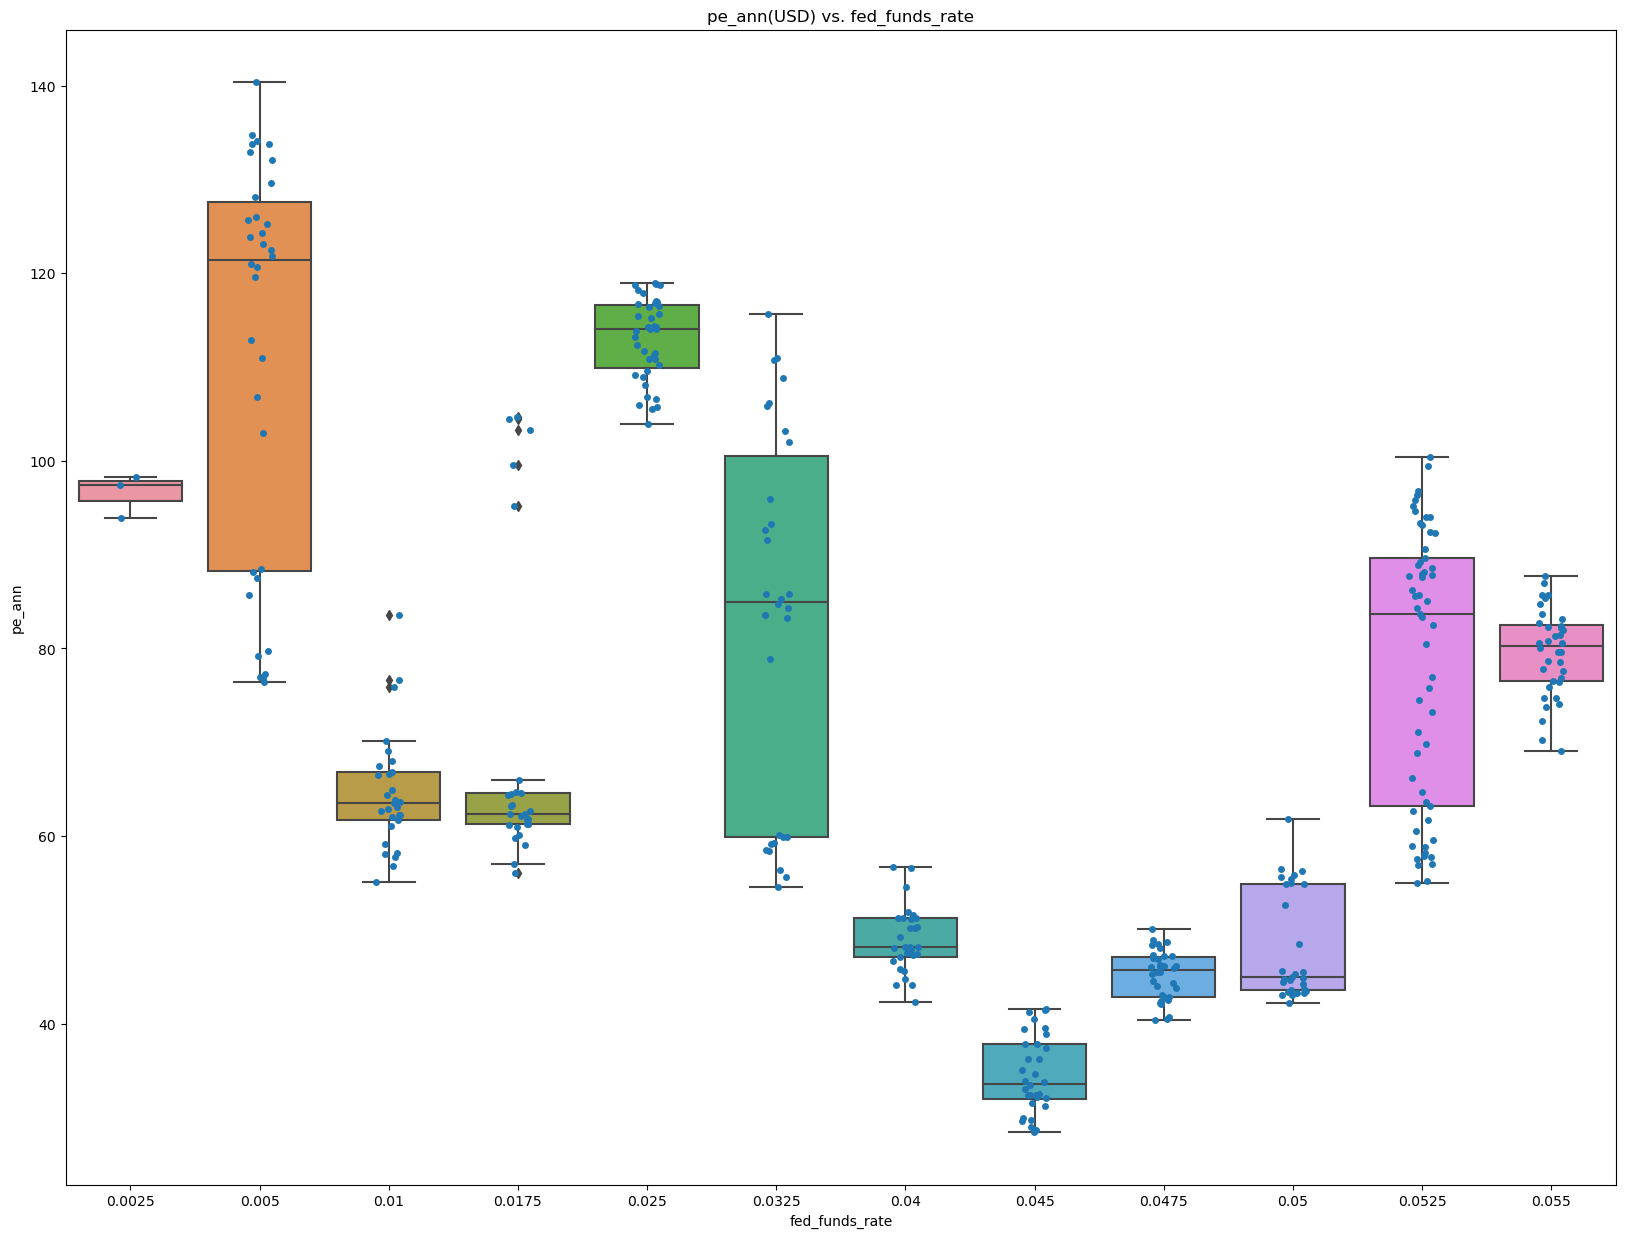

In [17]:
target_y = 'pe_ann'
column_x = 'fed_funds_rate'

plt.figure(figsize=(20, 15))
sns.boxplot(x=column_x, y=target_y, data=df)
sns.stripplot(x=column_x, y=target_y, data=df, jitter=True)
plt.title(target_y + "(USD) vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.show()

## Explore relationship between price and the day of the week

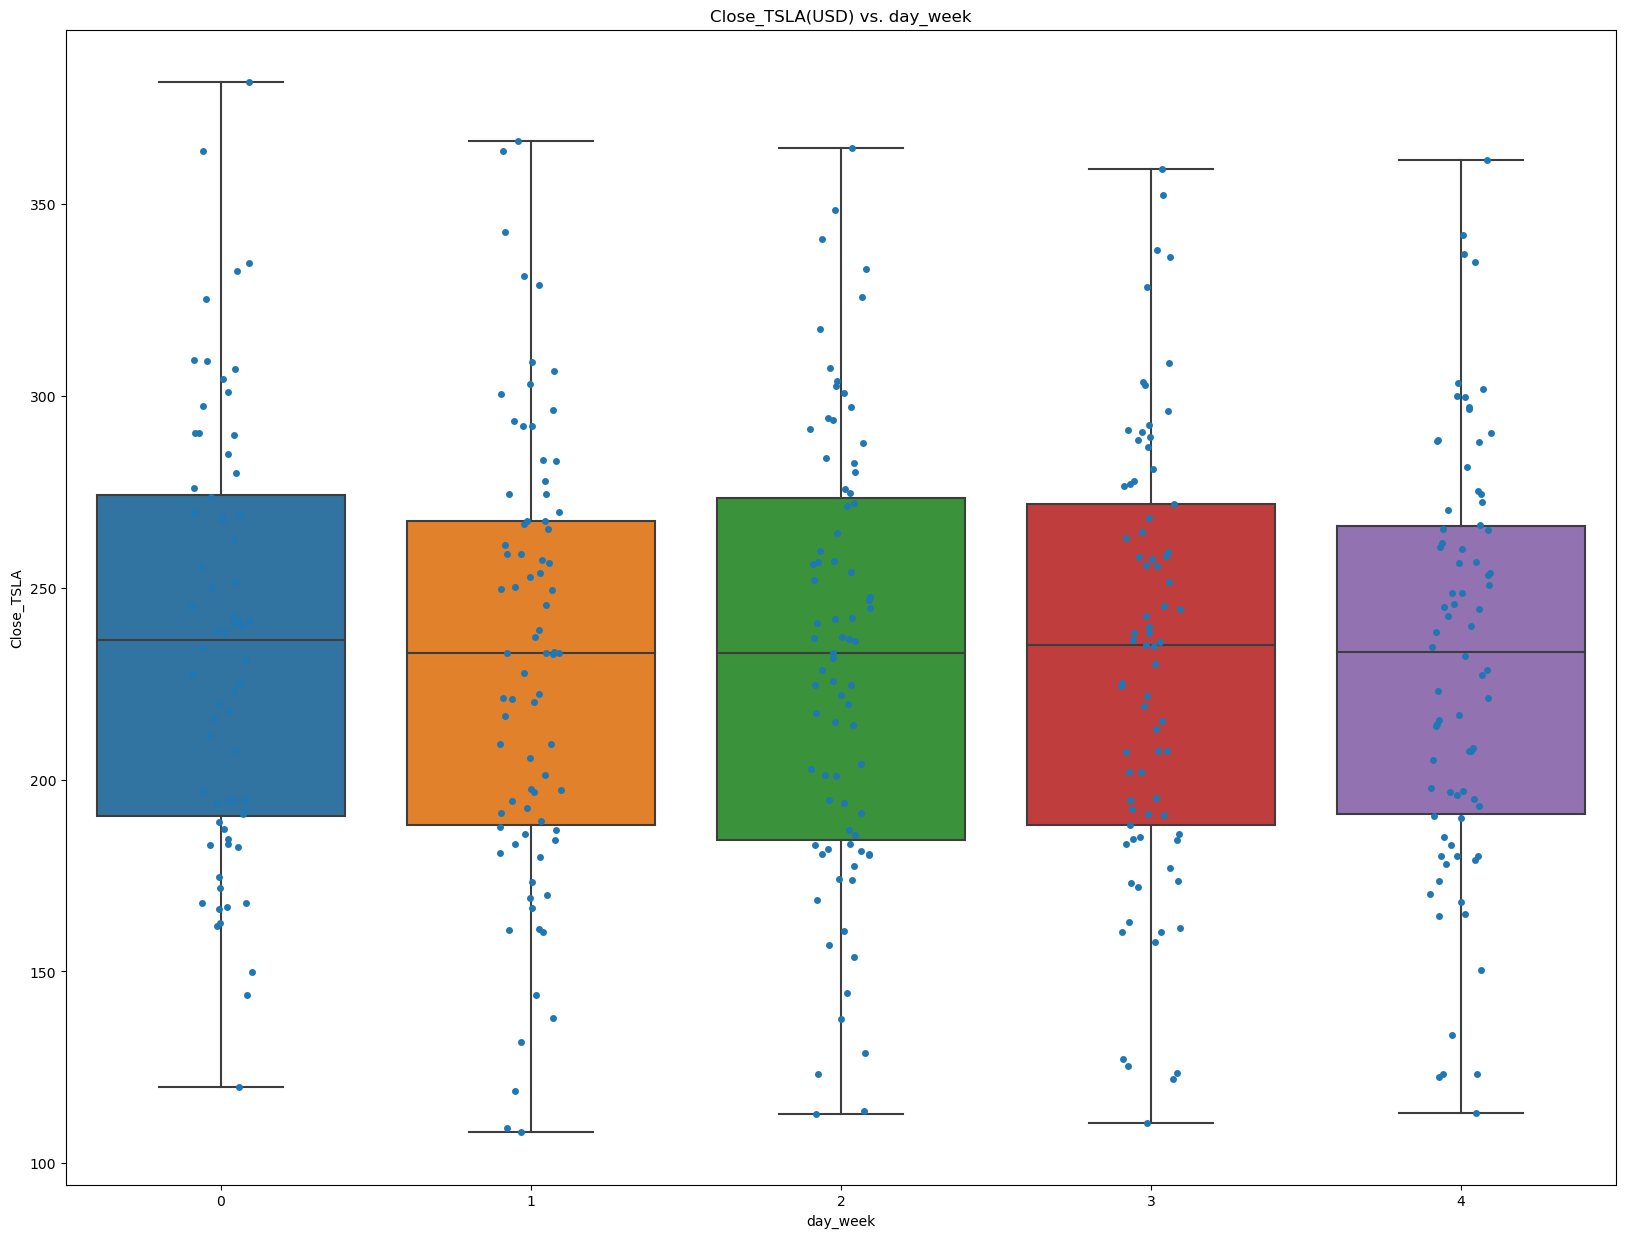

In [18]:
target_y = 'Close_TSLA'
column_x = 'day_week'

plt.figure(figsize=(20, 15))
sns.boxplot(x=column_x, y=target_y, data=df)
sns.stripplot(x=column_x, y=target_y, data=df, jitter=True)
plt.title(target_y + "(USD) vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.show()

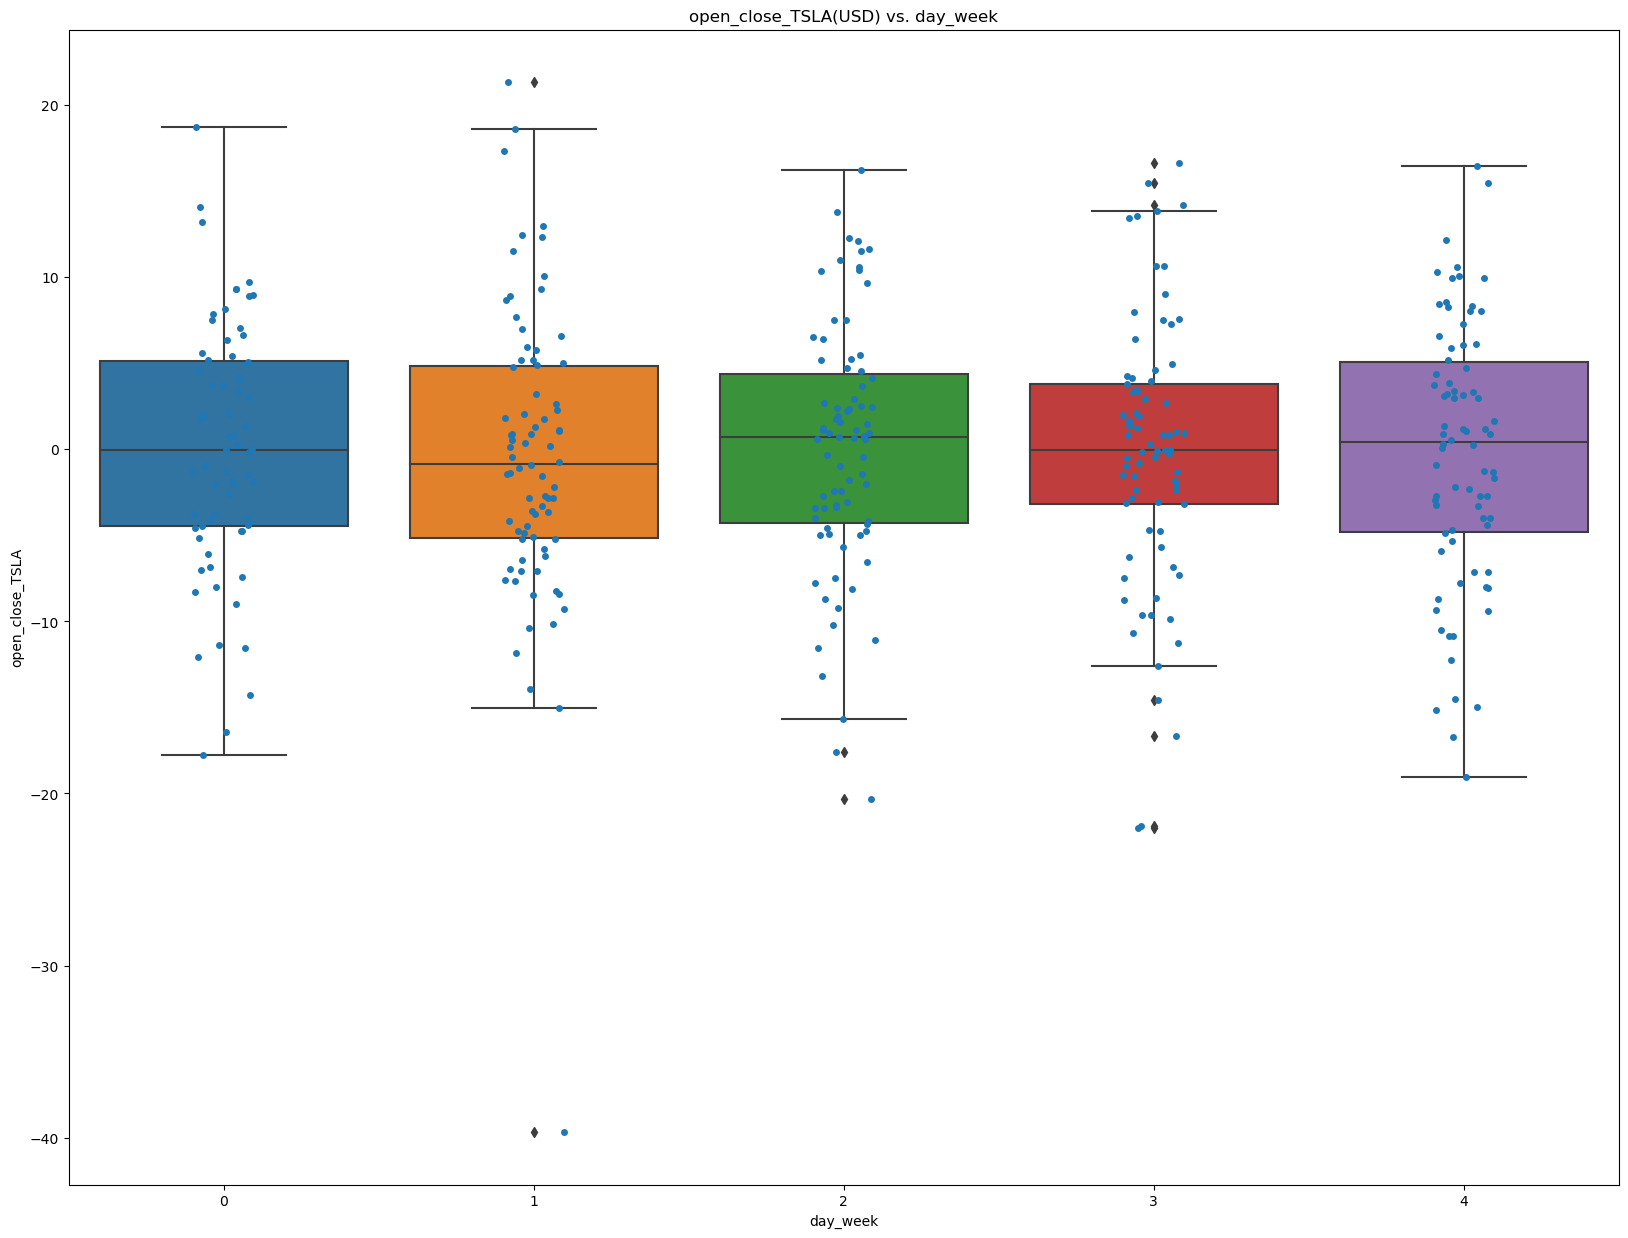

In [19]:
target_y = 'open_close_TSLA'
column_x = 'day_week'

plt.figure(figsize=(20, 15))
sns.boxplot(x=column_x, y=target_y, data=df)
sns.stripplot(x=column_x, y=target_y, data=df, jitter=True)
plt.title(target_y + "(USD) vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.show()

### Statistics on the open-close TSLA column by day of the week

In [20]:
day_week_stats = df.groupby('day_week').describe().transpose()
day_week_stats.loc['open_close_TSLA']

day_week,0,1,2,3,4
count,68.0,78.0,79.0,77.0,78.0
mean,-0.018677,-0.47393,0.029958,-0.20961,-0.269958
min,-17.759995,-39.669983,-20.333328,-21.983337,-19.01999
25%,-4.479168,-5.168335,-4.269997,-3.179993,-4.812504
50%,-0.025009,-0.834992,0.71666,-0.036667,0.415001
75%,5.107502,4.852505,4.339996,3.76001,5.092506
max,18.690003,21.32666,16.226685,16.599991,16.449982
std,7.253562,8.599311,7.299539,7.823672,7.671168


### Use a FOR loop to run analyze P/E Ratio vs. the 'tesla' variable set (defined above)

In [21]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Generate a 16-by-1 grid of subplots to display

# COMMENTING OUT ONLY TO SPEED ANALYSIS. UNCOMMENT FOR FINAL PRODUCT.

#fig, ax = plt.subplots(16,1, figsize=(15,210))

#target = 'pe_ann'

#plt.xticks(rotation=45)

# FOR loop that iterates through each feature in the "categorical" set and zips it into a tuple with a subplot
# Each subplot uses each feature and plots the respective feature as a boxplot measuring price range.
#for var, subplot in zip(tesla, ax.flatten()):
#    sns.boxplot(x=var, y=target, data=df, ax=subplot)
#plt.show()

### Additional EDA to find other relationships that might serve as predictors

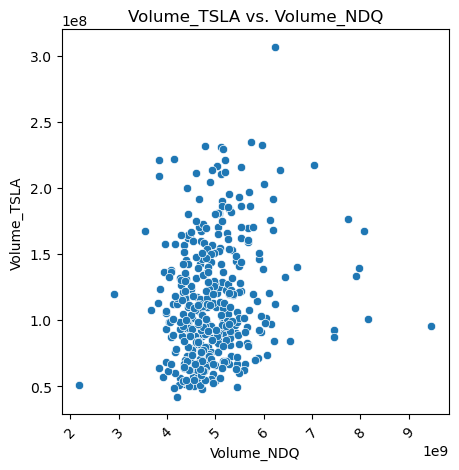

In [22]:
target_y = 'Volume_TSLA'
column_x = 'Volume_NDQ'

plt.figure(figsize=(5,5))
sns.scatterplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

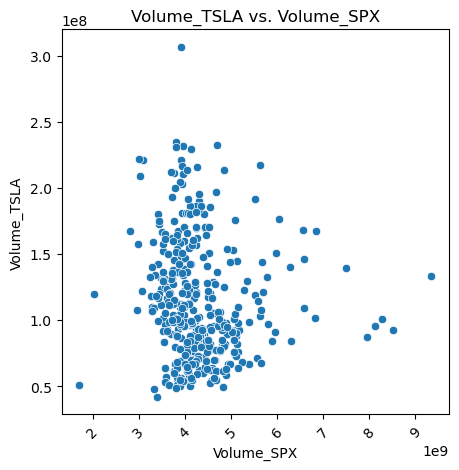

In [23]:
target_y = 'Volume_TSLA'
column_x = 'Volume_SPX'

plt.figure(figsize=(5,5))
sns.scatterplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

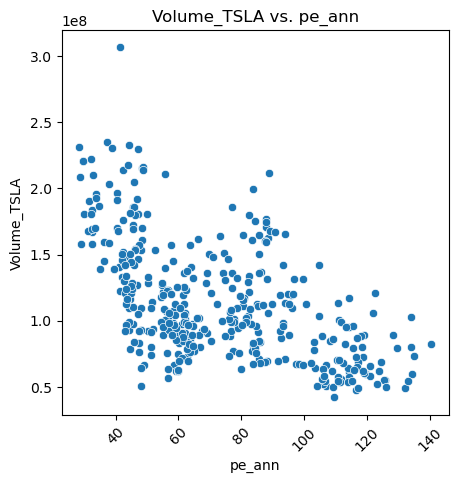

In [24]:
target_y = 'Volume_TSLA'
column_x = 'pe_ann'

plt.figure(figsize=(5,5))
sns.scatterplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

### Investigate TSLA's closing price against the 'nasdaq' variable set (above)

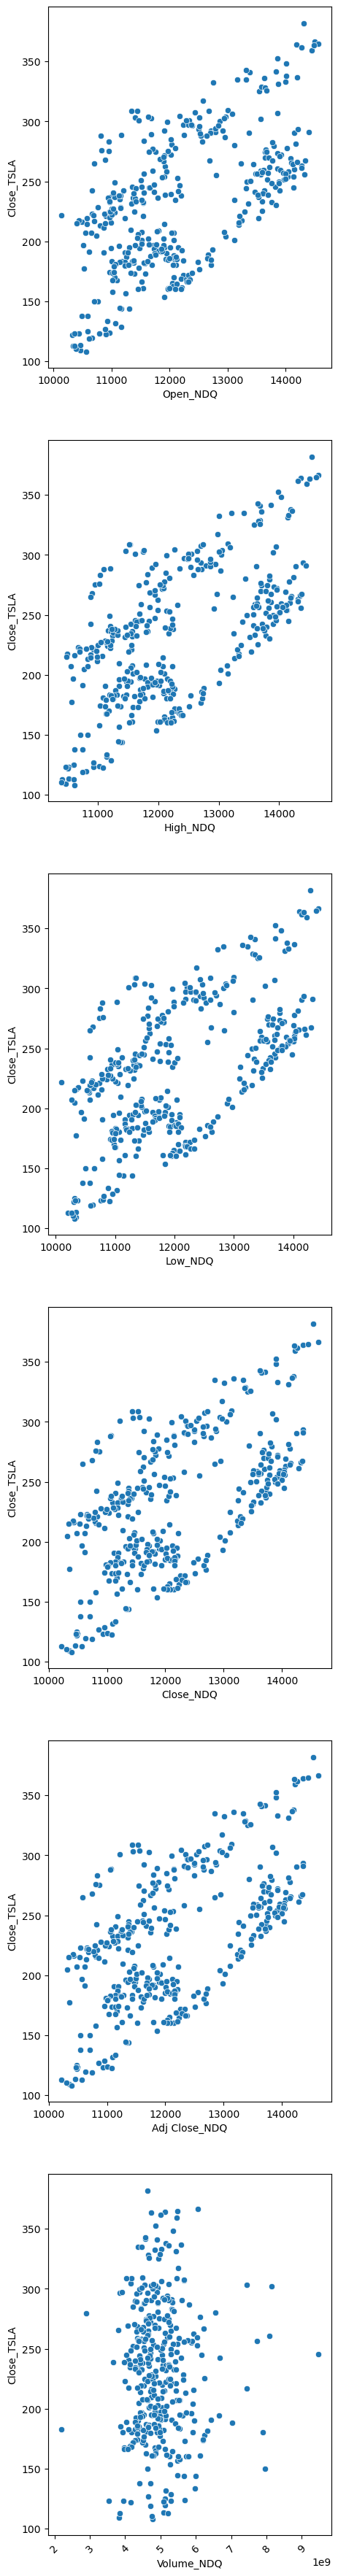

In [25]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Generate a 6-by-1 grid of subplots to display
fig, ax = plt.subplots(6,1, figsize=(5,45))

target = 'Close_TSLA'

plt.xticks(rotation=45)

# FOR loop that iterates through each feature in the "nominal" set and zips it into a tuple with a subplot
# Each subplot uses each feature and plots the respective feature as a boxplot measuring price range.
for var, subplot in zip(nasdaq, ax.flatten()):
    sns.scatterplot(x=var, y=target, data=df, ax=subplot)
plt.show()

### Heatmap of correlation values by feature

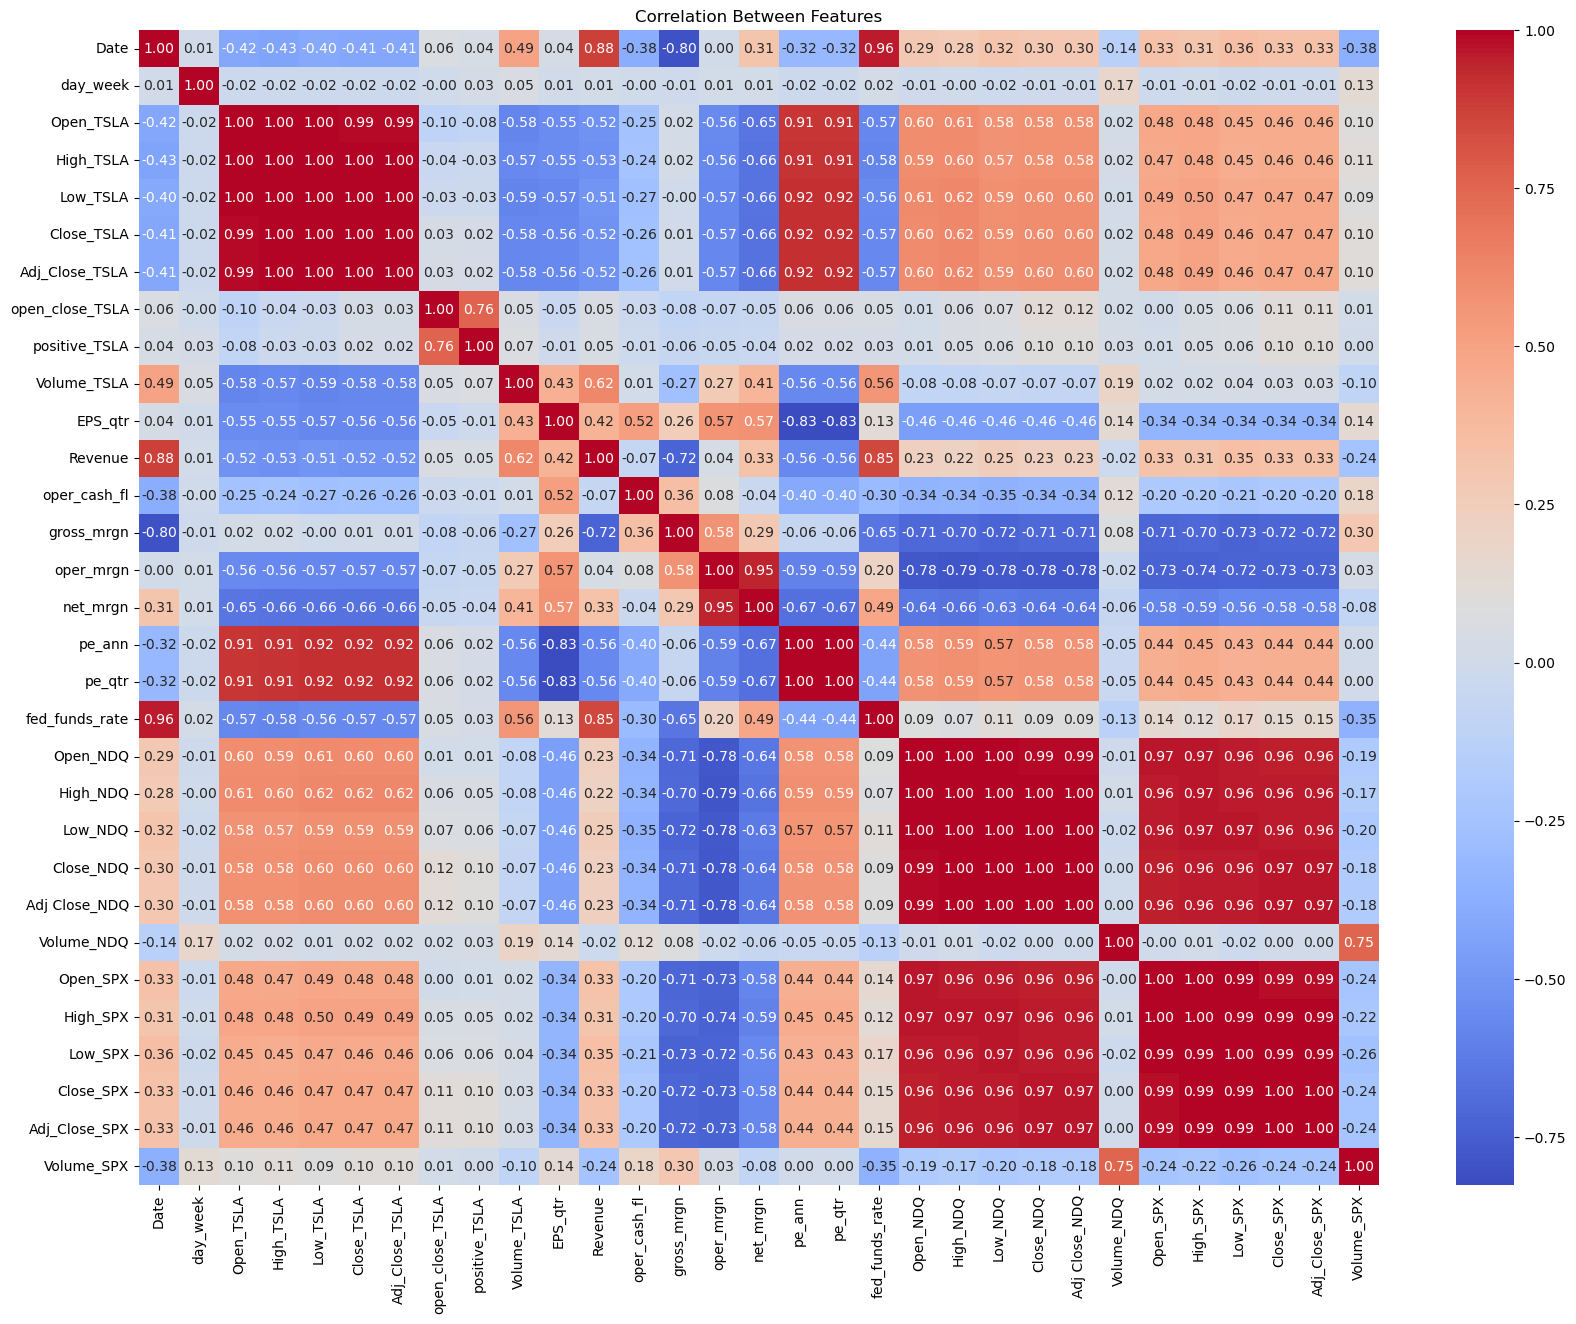

In [26]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f', annot_kws=None)
plt.title('Correlation Between Features')
plt.show()

### Display highest correlations between target and the other features in our dataset



In [27]:
df.corr().abs()['open_close_TSLA'].sort_values(ascending=False)

open_close_TSLA    1.000000
positive_TSLA      0.764211
Adj Close_NDQ      0.115798
Close_NDQ          0.115798
Adj_Close_SPX      0.111286
Close_SPX          0.111286
Open_TSLA          0.102563
gross_mrgn         0.080839
Low_NDQ            0.068830
oper_mrgn          0.067029
Low_SPX            0.061890
Date               0.058596
High_NDQ           0.058220
pe_ann             0.055624
pe_qtr             0.055624
net_mrgn           0.054955
Volume_TSLA        0.053045
Revenue            0.051464
fed_funds_rate     0.050581
High_SPX           0.050329
EPS_qtr            0.048268
High_TSLA          0.042456
oper_cash_fl       0.034188
Adj_Close_TSLA     0.033831
Close_TSLA         0.033831
Low_TSLA           0.028370
Volume_NDQ         0.015990
Volume_SPX         0.010348
Open_NDQ           0.010313
day_week           0.003698
Open_SPX           0.002230
Name: open_close_TSLA, dtype: float64

### Key Variables Visualizations

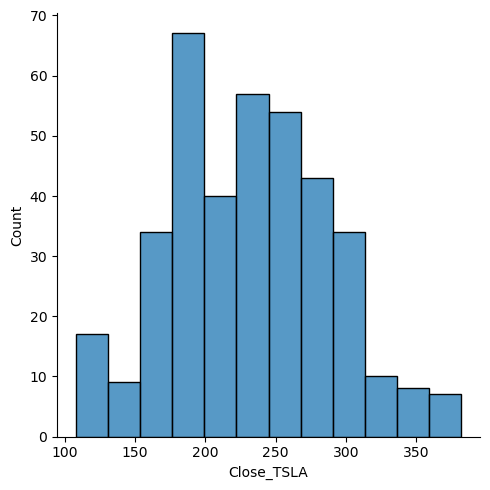

In [28]:
sns.displot(df, x='Close_TSLA')

<Figure size 1200x5600 with 0 Axes>

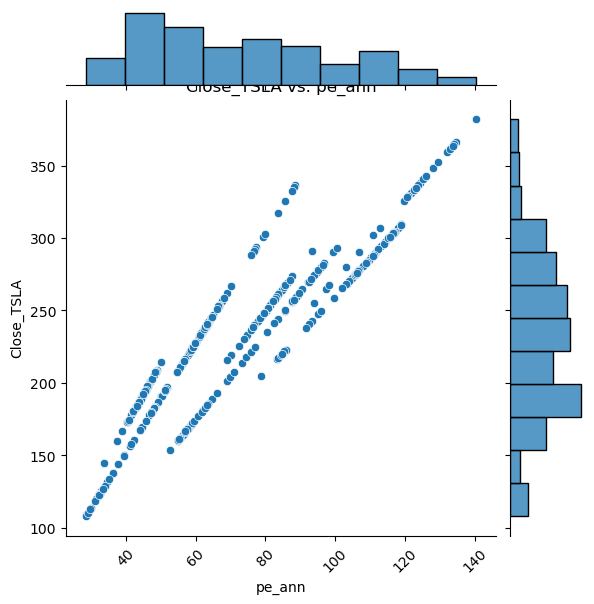

In [29]:
target_y = 'Close_TSLA'
column_x = 'pe_ann'

plt.figure(figsize=(12, 56))
sns.jointplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

## DISPLOT of variables broken down by US Federal discount rate

<Figure size 1200x5600 with 0 Axes>

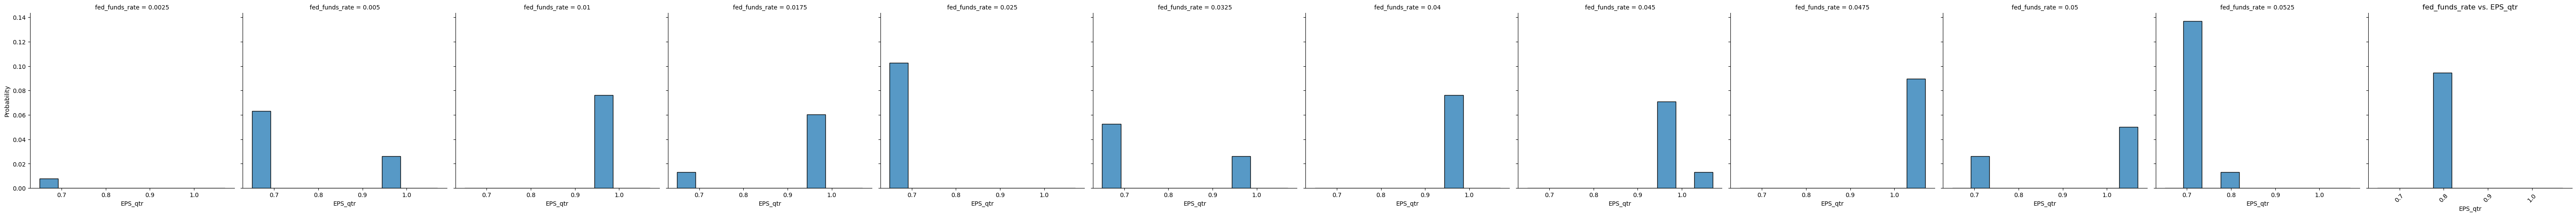

In [30]:
target_y = 'fed_funds_rate'
column_x = 'EPS_qtr'

plt.figure(figsize=(12, 56))
sns.displot(x=column_x, col=target_y, data=df, stat="probability")
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

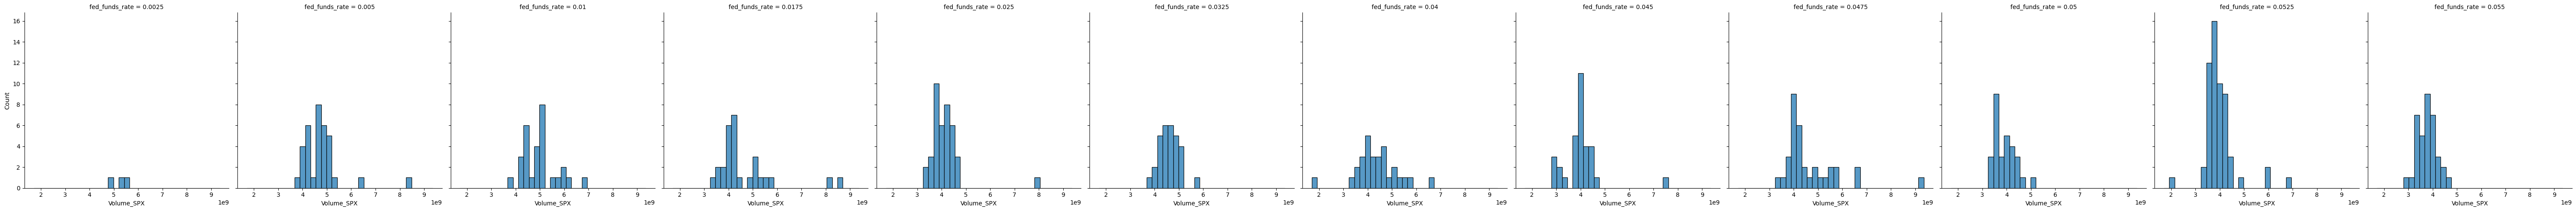

In [31]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
sns.displot(data = df, x="Volume_SPX", col="fed_funds_rate")


### S&P 500 vs. TSLA's P/E ratio (annualized EPS)

<Figure size 1e+06x1e+06 with 0 Axes>

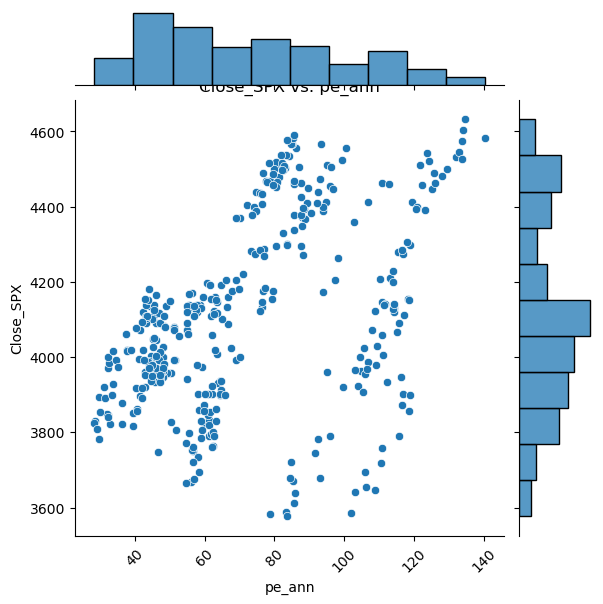

In [32]:
target_y = 'Close_SPX'
column_x = 'pe_ann'

plt.figure(figsize=(10000, 10000))
sns.jointplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

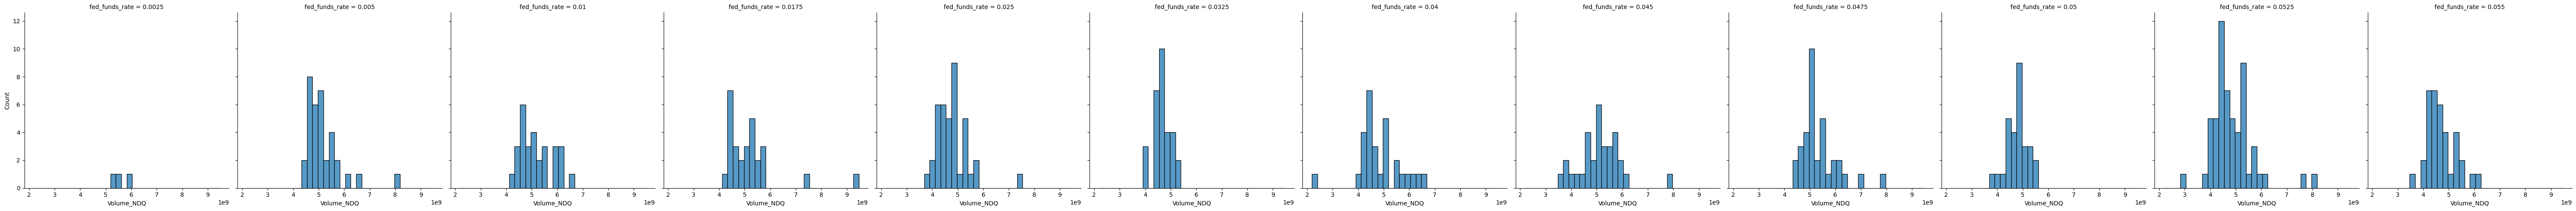

In [33]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
sns.displot(data = df, x="Volume_NDQ", col="fed_funds_rate")

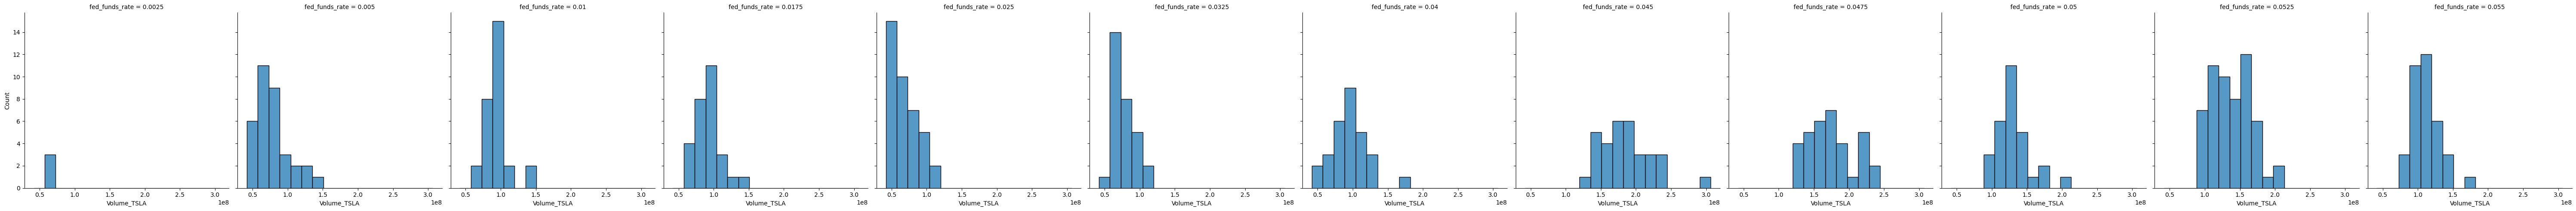

In [34]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
sns.displot(data = df, x="Volume_TSLA", col="fed_funds_rate")

# Modeling
## Descriptive Modeling
### Linear Regression on Z-score

#### Set outliers to 1.5*IQR max or min to prepare for value normalization using z score

Text(0.5, 1.0, 'Boxplot of Variable Raw Values')

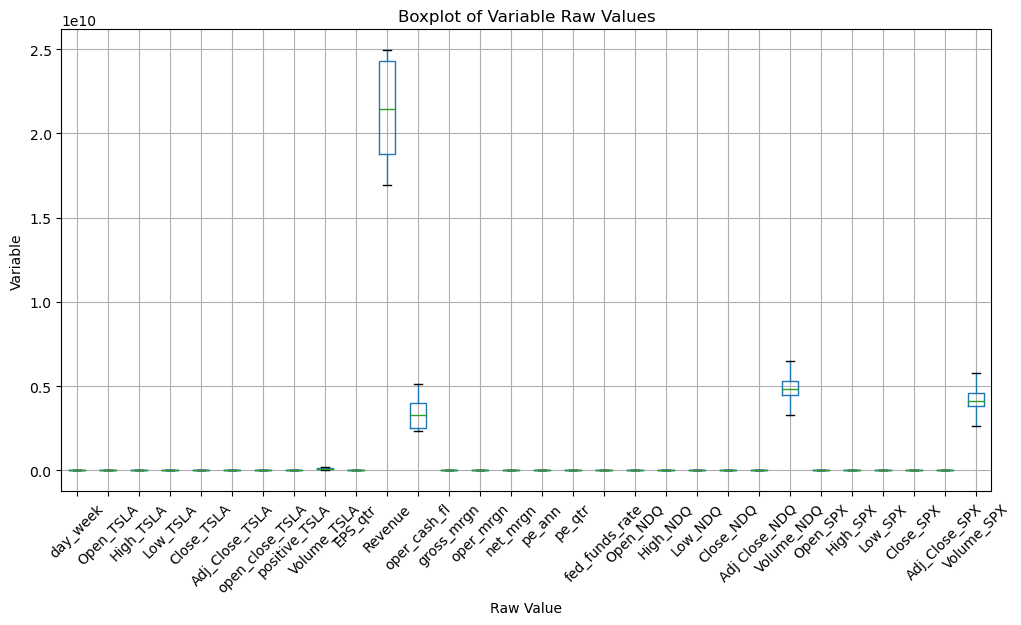

In [35]:
df_z = df.copy().drop(columns='Date')
IQR = df_z.quantile(.75)-df_z.quantile(.25)
clipped_min = df_z.quantile(.25) - (1.5*IQR)
clipped_max = df_z.quantile(.75) + (1.5*IQR)
outliers = df_z.columns

# Replace outlier variables with clipped_min or clipped_max, as appropriate
df_z[outliers] = np.where(df_z[outliers]<clipped_min[outliers], clipped_min[outliers], df_z[outliers])
df_z[outliers] = np.where(df_z[outliers]>clipped_max[outliers], clipped_max[outliers], df_z[outliers])
ax = df_z.boxplot(return_type='axes', rot=45, figsize=(12, 6))
ax.set_xlabel("Raw Value")
ax.set_ylabel("Variable")
ax.set_title("Boxplot of Variable Raw Values")

Outlier values have been handled.

#### Normalize values to z score now that outliers are handled with clipping

In [36]:
df_z = stats.zscore(df_z) # Normalize all columns by z score
df_z['positive_TSLA'] = df['positive_TSLA'] # Reset this column back to original '0' and '1' due to zscore

#### Separate normalized 'X' and 'y' into their own variables / dataframes

In [37]:
# Also removing parent variables as they accounted for in the newly derived variable open_close_TSLA and annual PE
train_Xz = df_z.drop(columns=['open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', 'Open_TSLA', 'pe_qtr',\
                              'EPS_qtr', 'Adj Close_NDQ', 'Adj_Close_SPX'])
train_yz = df_z['open_close_TSLA']

# Print coefficients of the regression model in descending order
lr_full_z = LinearRegression().fit(train_Xz, train_yz)
lr_full_coef_z = pd.DataFrame(zip(train_Xz.columns, lr_full_z.coef_))
lr_full_coef_z.sort_values(by=1, ascending=False)

,0,1
15,Close_NDQ,6.116286
18,High_SPX,2.317134
17,Open_SPX,1.383466
14,Low_NDQ,1.219146
10,pe_ann,1.138213
5,Revenue,1.000866
3,positive_TSLA,0.936385
8,oper_mrgn,0.704319
7,gross_mrgn,0.219930
6,oper_cash_fl,0.106201


### Linear Regression on Original Values

In [38]:
# Repeat on original dataframe

# Separate 'X' and 'y' into their own variables / dataframes
# Also removing parent variables so as not to influence training on target derived variable
train_X = df.drop(columns=['Date', 'open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', \
                           'Open_TSLA', 'pe_qtr', 'EPS_qtr', 'Adj Close_NDQ', 'Adj_Close_SPX'])
train_y = df['open_close_TSLA']

lr_full = LinearRegression().fit(train_X, train_y)
lr_full_coef = pd.DataFrame(zip(train_X.columns, lr_full.coef_))
lr_full_coef.sort_values(by=1, ascending=False)

,0,1
9,net_mrgn,5.651790e+02
7,gross_mrgn,1.440692e+02
3,positive_TSLA,6.778632e+00
10,pe_ann,3.073431e-01
18,High_SPX,6.875738e-02
2,Low_TSLA,5.581000e-02
17,Open_SPX,4.348869e-02
15,Close_NDQ,4.255720e-02
14,Low_NDQ,8.150416e-03
4,Volume_TSLA,7.697605e-09


### Logistic Regression (Cross Validated x5 w/ L2 penalty)

In [39]:
df_lr = df.copy()
# Remove redundant variables (due to target variable being derived by these parent variables)
train_X_lr = df_lr.drop(columns=['Date', 'positive_TSLA','open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', \
                                 'Open_TSLA', 'pe_qtr', 'EPS_qtr', 'Adj Close_NDQ', 'Adj_Close_SPX'])
# Separate the target variable to train on if TSLA close went up or down (without regard to magnitude)
train_y_lr = df_lr['positive_TSLA']

logit_train = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=500) #l2 penalty by default
logit_train.fit(train_X_lr, train_y_lr)

LogisticRegressionCV(cv=5, max_iter=500)

In [40]:
# Derived from Shmueli (2019)
print('intercept ', logit_train.intercept_[0])
print(pd.DataFrame({'coeff': logit_train.coef_[0]}, index=train_X_lr.columns).sort_values(by='coeff', ascending=False))

intercept  -1.1370680618741833e-17
                       coeff
Volume_TSLA     2.725146e-09
Volume_NDQ      6.656374e-11
Close_NDQ       1.967591e-13
Low_NDQ         3.777325e-14
Close_SPX       2.969175e-14
High_NDQ        1.200492e-14
pe_ann          2.286487e-15
day_week        8.992731e-17
fed_funds_rate -5.321000e-19
net_mrgn       -4.029914e-18
oper_mrgn      -4.201586e-18
gross_mrgn     -5.463537e-18
Low_TSLA       -5.166819e-15
High_TSLA      -6.954278e-15
Low_SPX        -7.876333e-15
High_SPX       -1.551247e-14
Open_SPX       -5.157055e-14
Open_NDQ       -1.437899e-13
Revenue        -8.891385e-12
oper_cash_fl   -4.992309e-11
Volume_SPX     -5.370933e-11


### Logistic Regression on Z-scores (Cross Validated x5 w/ L2 penalty)

In [41]:
df_lr_z = df_z.copy()
train_X_lr_z = df_lr_z.drop(columns=['positive_TSLA','open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', \
                                 'Open_TSLA', 'pe_qtr', 'EPS_qtr', 'Adj Close_NDQ', 'Adj_Close_SPX'])
train_y_lr_z = df_lr['positive_TSLA']

logit_train_z = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=500) #l2 penalty by default
logit_train_z.fit(train_X_lr_z, train_y_lr_z)

# Derived from Shmueli (2019)
print('intercept ', logit_train_z.intercept_[0])
print(pd.DataFrame({'coeff': logit_train_z.coef_[0]}, index=train_X_lr_z.columns).sort_values(by='coeff', ascending=False))

intercept  0.01054966400751913
                   coeff
Close_NDQ       4.333672
Close_SPX       3.223386
pe_ann          2.603811
Revenue         2.245664
oper_mrgn       0.942747
Low_NDQ         0.779641
High_NDQ        0.315496
gross_mrgn      0.225364
Low_SPX         0.179030
oper_cash_fl    0.142790
High_SPX        0.078494
Volume_TSLA     0.077345
Volume_NDQ      0.031286
day_week        0.022646
Volume_SPX     -0.061157
Low_TSLA       -0.107306
net_mrgn       -0.831671
fed_funds_rate -1.435334
High_TSLA      -1.728777
Open_SPX       -3.893566
Open_NDQ       -5.321530


## Predictive Model
### [To-Do]: Build model(s) based on previous records' ability to predict future price movement.
#### Can previous data be used to predict future data?

In [42]:
#df = df.drop(columns=[''])

In [43]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Divide features into arrays by type
tesla = [
  
]
nasdaq = [
  
]
# Categorical is assumed because original dataset did not have a README file defining these feature names
# Ambiguous on m_dep, n_cores (number or type), and price range (could be basic, low, medium, high)
spx = [
  
]

In [44]:
# Reference: https://www.dataquest.io/blog/portfolio-project-predicting-stock-prices-using-pandas-and-scikit-learn/
df_rf = df.copy()

# Column divide into predictors and target
X_rf = df_rf.drop(columns=['Date', 'positive_TSLA', 'open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', \
                                 'Open_TSLA', 'pe_qtr', 'EPS_qtr', 'Adj Close_NDQ', 'Adj_Close_SPX'])
y_rf = df_rf['positive_TSLA']

# Truncate number of records at the beginning for target and the end for predictors by 'depth_days'
# This is to avoid going outside of index
depth_days = 5
predictors = X_rf.iloc[:-depth_days]
target = y_rf.iloc[depth_days:]#.reset_index(drop=True) #Align indices of target down to predictor indices

#X_subset = pd.DataFrame()

#for i in range([0:depth_days]):
#    if i < depth_days:
#        X_subset.iloc[i] = 0
#    else:
#        X_subset.iloc[i] = df.iloc[i-6:i-1]
#    X_subset.concat([X, x[i]], axis=1)
    
#X_subset

# Split data into training and validation sets
train_df, valid_df, train_y, valid_y = train_test_split(predictors, target, test_size=0.4, random_state=14)

rf_train = RandomForestClassifier(n_estimators=100, min_samples_split=128, criterion='gini', random_state=14)
rf_train.fit(train_df, train_y)

rf_train_pred = rf_train.predict(valid_df[predictors.columns])
rf_train_pred = pd.Series(rf_train_pred, index=valid_df.index)
precision = precision_score(valid_y, rf_train_pred)
print("Precision =", precision)

Precision = 0.46846846846846846


In [45]:
# Referencing directly from Schmueli's (2019) use of DecisionTreeRegressor and using param_grid as default values
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': [1, 3, 5, 10],
    'min_samples_split': [2, 4, 8, 16, 32, 64, 128], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1) # CV with 5 folds and all CPUs
grid_search.fit(X_rf, y_rf)

rf = grid_search.best_estimator_

In [46]:
rf

RandomForestClassifier(max_depth=10, min_impurity_decrease=0.01,
                       min_samples_split=16)

In [47]:
rf_cv = RandomForestClassifier(max_depth=10, min_impurity_decrease=0, min_samples_split=8, random_state=14)
rf_cv.fit(train_df, train_y)

rf_cv_pred = rf_cv.predict(valid_df[predictors.columns])
rf_cv_pred = pd.Series(rf_cv_pred, index=valid_df.index)
precision = precision_score(valid_y, rf_cv_pred)
print("Precision =", precision)

Precision = 0.4819277108433735


In [48]:
pd.DataFrame(zip(rf_cv.feature_names_in_, rf_cv.feature_importances_)).sort_values(by=1, ascending=False)

,0,1
20,Volume_SPX,0.086778
2,Low_TSLA,0.081018
19,Close_SPX,0.078654
1,High_TSLA,0.069769
15,Volume_NDQ,0.067525
17,High_SPX,0.065966
18,Low_SPX,0.060586
16,Open_SPX,0.058386
3,Volume_TSLA,0.055391
12,High_NDQ,0.055232


### Predictive Model #2: Use trailing n days (depth_days) to predict if the next day will be positive or not
#### Not using index shift like above

In [49]:
depth_days = 7
prediction_index = 14
X_rf.iloc[prediction_index]

day_week          3.000000e+00
High_TSLA         3.677133e+02
Low_TSLA          3.588800e+02
Volume_TSLA       4.899270e+07
Revenue           1.771900e+10
oper_cash_fl      4.585000e+09
gross_mrgn        2.528000e-01
oper_mrgn         1.212000e-01
net_mrgn          1.026000e-01
pe_ann            1.320588e+02
fed_funds_rate    5.000000e-03
Open_NDQ          1.444478e+04
High_NDQ          1.445674e+04
Low_NDQ           1.421772e+04
Close_NDQ         1.422052e+04
Volume_NDQ        5.453890e+09
Open_SPX          4.599020e+03
High_SPX          4.603070e+03
Low_SPX           4.530410e+03
Close_SPX         4.530410e+03
Volume_SPX        4.823020e+09
Name: 14, dtype: float64

In [50]:
X_rf.iloc[prediction_index-depth_days:prediction_index]

,day_week,High_TSLA,Low_TSLA,Volume_TSLA,Revenue,oper_cash_fl,gross_mrgn,oper_mrgn,net_mrgn,pe_ann,...,Open_NDQ,High_NDQ,Low_NDQ,Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Volume_SPX
7,1,332.619995,307.250000,105868500,17719000000,4585000000,0.2528,0.1212,0.1026,121.811272,...,13866.42969,14141.07031,13857.29004,14108.82031,5445100000,4469.100098,4522.000000,4469.100098,4511.609863,4754840000
8,2,346.899994,325.466675,120676200,17719000000,4585000000,0.2528,0.1212,0.1026,122.439957,...,13990.34961,14152.13965,13921.65039,13922.59961,5024230000,4493.100098,4501.069824,4455.810059,4456.240234,4550670000
9,3,341.496674,329.600006,68920800,17719000000,4585000000,0.2528,0.1212,0.1026,124.254900,...,14001.32031,14193.54981,13897.20020,14191.83984,5149520000,4469.979980,4520.580078,4465.169922,4520.160156,4131390000
10,4,340.600006,332.440002,62031600,17719000000,4585000000,0.2528,0.1212,0.1026,123.852943,...,14194.71973,14218.75977,14010.79004,14169.29981,5585100000,4522.910156,4546.029785,4501.069824,4543.060059,4305020000
11,0,365.959991,351.200012,102506100,17719000000,4585000000,0.2528,0.1212,0.1026,133.803917,...,14177.20996,14356.00000,14101.33984,14354.90039,5129500000,4541.089844,4575.649902,4517.689941,4575.520020,4312260000
12,1,371.589996,357.703339,73614900,17719000000,4585000000,0.2528,0.1212,0.1026,134.751230,...,14500.38965,14646.90039,14419.40039,14619.63965,6060890000,4602.859863,4637.299805,4589.660156,4631.600098,5085910000
13,2,371.316681,361.333344,59865000,17719000000,4585000000,0.2528,0.1212,0.1026,134.067401,...,14558.58984,14609.25000,14383.45020,14442.26953,5479200000,4624.200195,4627.770020,4581.319824,4602.450195,4385570000


In [51]:
predictors = X_rf.iloc[prediction_index-depth_days:prediction_index]
target = y_rf.iloc[prediction_index]

In [52]:
target

0

In [53]:
# User-defined: How many previous days do you want to use for the prediction?
depth_days = 10
prediction_index = 200 #To-Do: Find a way to iterate through for all prediction indices
prediction_index_values = X_rf.index.values # Array of index values in X_rf

# Find a way to partition training set as the set of all depth_days long trailing records with target
# positive_TSLA value of next record
# Goal: Training set[previous n-records from index-1 to index-depth_days]
#       Target set['positive_TSLA'].iloc[<index>]

X_subset = pd.DataFrame()
for x in prediction_index_values:
    if x < depth_days:
        break
    else:
        X_subset.concat([X_subset],axis=1)

predictor_index_range = prediction_index_values[prediction_index-depth_days:prediction_index]
predictors = X_rf.iloc[predictor_index_range]
target = y_rf.iloc[prediction_index]

rf_train = RandomForestClassifier(max_depth=10, min_impurity_decrease=0, \
                                                        min_samples_split=8, random_state=14)
#rf_train.fit(predictors, target)

# Split data into training and validation sets
#train_df, valid_df, train_y, valid_y = train_test_split(predictors, target, test_size=0.4, random_state=1)

#rf_train_pred = rf_train.predict(valid_df[predictors.columns])
#rf_train_pred = pd.Series(rf_train_pred, index=valid_df.index)
#precision = precision_score(valid_y, rf_train_pred)
#print("Precision =", precision)

### A priori model: Train on known positive_TSLA = 1 for intraday

In [54]:
X_z = df_z.drop(columns=['positive_TSLA', 'open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', \
                         'pe_qtr', 'EPS_qtr', 'Close_NDQ', 'Adj Close_NDQ', 'Close_SPX', 'Adj_Close_SPX'])
y_z = df_z['positive_TSLA']

pos_train_df, pos_valid_df, pos_train_y, pos_valid_y = train_test_split(X_z, y_z, test_size=0.4, random_state=1)

rf_train = RandomForestClassifier(max_depth=10, min_impurity_decrease=0, \
                                                        min_samples_split=8, random_state=14)
rf_train.fit(pos_train_df, pos_train_y)

rf_train_pred = rf_train.predict(pos_valid_df[X_z.columns])
rf_train_pred = pd.Series(rf_train_pred, index=pos_valid_df.index)
precision = precision_score(pos_valid_y, rf_train_pred)
print("Precision =", precision)

Precision = 0.5164835164835165


In [55]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', solver='lbfgs', max_iter=500, random_state=14)
mlp.fit(pos_train_df, pos_train_y)

nn_train_pred = mlp.predict(pos_valid_df[X_z.columns])
nn_train_pred = pd.Series(nn_train_pred, index=pos_valid_df.index)
precision = precision_score(pos_valid_y, nn_train_pred)
print("Precision =", precision)

#print(confusion_matrix(pos_valid_y, nn_train_pred))
#print(classification_report(pos_valid_y, nn_train_pred))

Precision = 0.6739130434782609


In [56]:
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='relu', solver='lbfgs', max_iter=500, random_state=14)
mlp.fit(pos_train_df, pos_train_y)

nn_train_pred = mlp.predict(pos_valid_df[X_z.columns])
nn_train_pred = pd.Series(nn_train_pred, index=pos_valid_df.index)
precision = precision_score(pos_valid_y, nn_train_pred)
print("Precision =", precision)

#print(confusion_matrix(pos_valid_y, nn_train_pred))
#print(classification_report(pos_valid_y, nn_train_pred))

Precision = 0.5943396226415094


Precision = 0.9402985074626866
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        77
           1       0.94      0.84      0.89        75

    accuracy                           0.89       152
   macro avg       0.90      0.89      0.89       152
weighted avg       0.90      0.89      0.89       152



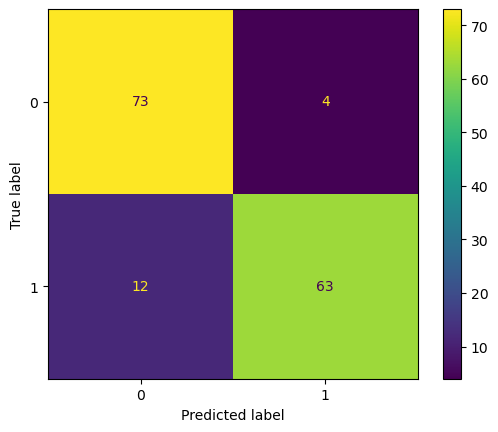

In [57]:
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='identity', solver='lbfgs', max_iter=500, random_state=14)
mlp.fit(pos_train_df, pos_train_y)

nn_train_pred = mlp.predict(pos_valid_df[X_z.columns])
nn_train_pred = pd.Series(nn_train_pred, index=pos_valid_df.index)
precision = precision_score(pos_valid_y, nn_train_pred)
print("Precision =", precision)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
#            #sklearn.metrics.ConfusionMatrixDisplay
cm = confusion_matrix(pos_valid_y, nn_train_pred, labels=mlp.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
cmd.plot()
print(classification_report(pos_valid_y, nn_train_pred))

In [58]:
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='identity', solver='lbfgs', max_iter=500, random_state=17)
mlp.fit(pos_train_df, pos_train_y)

nn_train_pred = mlp.predict(pos_valid_df[X_z.columns])
nn_train_pred = pd.Series(nn_train_pred, index=pos_valid_df.index)
precision = precision_score(pos_valid_y, nn_train_pred)
print("Precision =", precision)

#print(confusion_matrix(pos_valid_y, nn_train_pred))
#print(classification_report(pos_valid_y, nn_train_pred))

Precision = 0.9402985074626866


In [59]:
# Referencing directly from Schmueli's (2019) use of DecisionTreeRegressor and using param_grid as default values
param_grid = {
    'hidden_layer_sizes': [1, 2, 4, 8, 16],
    'activation': ["relu"],
    'solver': ['lbfgs'],
    'max_iter': [500, 1000, 2000], 
}

grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5, n_jobs=-1) # CV with 5 folds and all CPUs
grid_search.fit(X_z, y_z)

rf = grid_search.best_estimator_

In [60]:
rf

MLPClassifier(hidden_layer_sizes=4, max_iter=2000, solver='lbfgs')

In [61]:
pd.set_option('display.max_rows',380)
predictors

,day_week,High_TSLA,Low_TSLA,Volume_TSLA,Revenue,oper_cash_fl,gross_mrgn,oper_mrgn,net_mrgn,pe_ann,...,Open_NDQ,High_NDQ,Low_NDQ,Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Volume_SPX
190,0,177.369995,167.520004,109794500,21454000000,5100000000,0.2661,0.1652,0.1495,44.163160,...,11015.48047,11144.66992,10984.82031,11143.74023,4829990000,3939.290039,3990.709961,3935.300049,3990.560059,3904130000
191,1,175.050003,156.910004,175862700,21454000000,5100000000,0.2661,0.1652,0.1495,42.355262,...,11542.83984,11571.63965,11160.54004,11256.80957,6126890000,4069.379883,4100.959961,3993.030029,4019.649902,5079360000
192,2,161.619995,155.309998,140682300,21454000000,5100000000,0.2661,0.1652,0.1495,41.263159,...,11248.08984,11352.08984,11065.24023,11170.88965,5485150000,4015.540039,4053.760010,3965.649902,3995.320068,4472340000
193,3,160.929993,153.279999,122334500,21454000000,5100000000,0.2661,0.1652,0.1495,41.492105,...,11012.62012,11029.57031,10775.61035,10810.53027,5536070000,3958.370117,3958.370117,3879.449951,3895.750000,4493900000
194,4,160.990005,150.039993,139032200,21454000000,5100000000,0.2661,0.1652,0.1495,39.534209,...,10767.62988,10833.24023,10642.09961,10705.41016,7968170000,3890.909912,3890.909912,3827.909912,3852.360107,7493660000
195,0,155.250000,145.820007,139390600,21454000000,5100000000,0.2661,0.1652,0.1495,39.439472,...,10707.44043,10713.96973,10497.54981,10546.03027,4631820000,3853.790039,3854.860107,3800.040039,3817.659912,3969610000
196,1,148.470001,137.660004,159563300,21454000000,5100000000,0.2661,0.1652,0.1495,36.263159,...,10490.88965,10609.45996,10446.82031,10547.11035,4707190000,3810.469971,3838.239990,3795.620117,3821.620117,3985370000
197,2,141.259995,135.889999,145417400,21454000000,5100000000,0.2661,0.1652,0.1495,36.202633,...,10592.00000,10753.57031,10569.20020,10709.37012,4401420000,3839.489990,3889.820068,3839.489990,3878.439941,3775200000
198,3,136.630005,122.260002,210090300,21454000000,5100000000,0.2661,0.1652,0.1495,32.986842,...,10586.45996,10599.33984,10313.32031,10476.12012,5125070000,3853.260010,3853.260010,3764.489990,3822.389893,3956950000
199,4,128.619995,121.019997,166989700,21454000000,5100000000,0.2661,0.1652,0.1495,32.407895,...,10437.75000,10514.75977,10361.82031,10497.86035,3544680000,3815.110107,3845.800049,3797.010010,3844.820068,2819280000


### Regression Tree model

In [62]:
df_rt_z = df_z.copy()
X_rt_z = df_lr_z.drop(columns=['positive_TSLA','open_close_TSLA', 'Close_TSLA', 'Adj_Close_TSLA', \
                                 'Open_TSLA', 'pe_qtr', 'EPS_qtr', 'Adj Close_NDQ', 'Adj_Close_SPX'])
y_rt_z = df_lr['positive_TSLA']

# Split data into training (60%) and test (40%) sets
X_train_rt, X_valid_rt, y_train_rt, y_valid_rt  = train_test_split(X_rt_z, y_rt_z, test_size=0.4, random_state=1)

# Create a base Decision Tree Regressor with a range of max_depth values to search 
tree_reg = DecisionTreeRegressor(random_state=1)

# Specify the values of max_depth to search
param_grid = {'max_depth': [5, 10, 15, 20, 25, 30, 50, 75, 100]}

# find optimal max_depth parameter
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_rt, y_train_rt)

# Set variable to hold optimal max_depth
best_max_depth = grid_search.best_params_['max_depth']
print("The best max_depth is: ", best_max_depth)

# Fit a Decision Tree Regression model
rt_model = DecisionTreeRegressor(max_depth=best_max_depth,random_state=1)
rt_model.fit(X_train_rt, y_train_rt)

# Make predictions on the validation set
y_pred_rt = rt_model.predict(X_valid_rt)

# Calculate evaluation measures
mse_rt = mean_squared_error(y_valid_rt, y_pred_rt)
rmse_rt = mean_squared_error(y_valid_rt, y_pred_rt, squared=False)
mae_rt = mean_absolute_error(y_valid_rt, y_pred_rt)
r2_rt = r2_score(y_valid_rt, y_pred_rt)

# Apply formatting to the outcomes 
mse_rt = '{:,.4f}'.format(mse_rt)
rmse_rt = '{:.4f}'.format(rmse_rt)
mae_rt = '{:.4f}'.format(mae_rt)
r2_rt = '{:.4f}'.format(r2_rt)


print('Mean Squared Error (MSE) - Tree:', mse_rt)
print('Root Mean Squared Error (RMSE) - Tree:', rmse_rt)
print('Mean Absolute Error (MAE) - Tree:', mae_rt)
print('R-squared (R2) - Tree:', r2_rt)

The best max_depth is:  5
Mean Squared Error (MSE) - Tree: 0.2821
Root Mean Squared Error (RMSE) - Tree: 0.5311
Mean Absolute Error (MAE) - Tree: 0.4689
R-squared (R2) - Tree: -0.1286


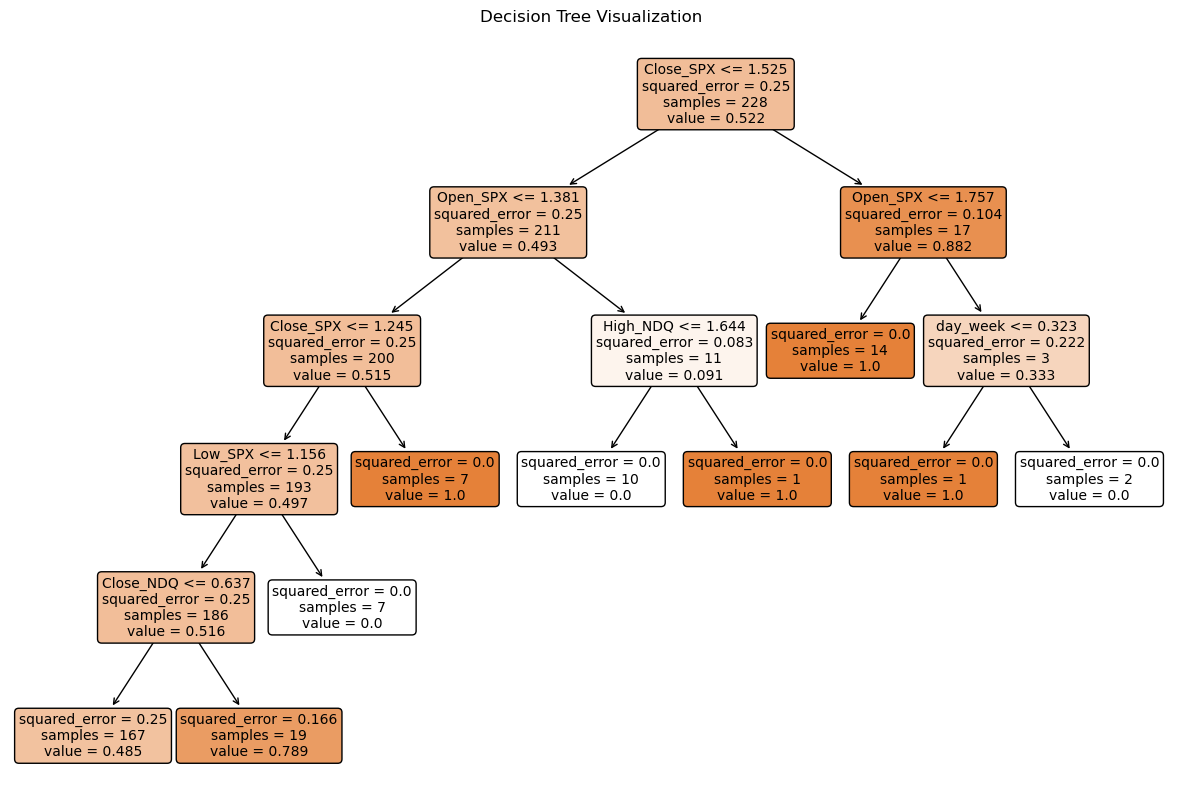

In [63]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(rt_model, feature_names=X_rt_z.columns.to_list(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

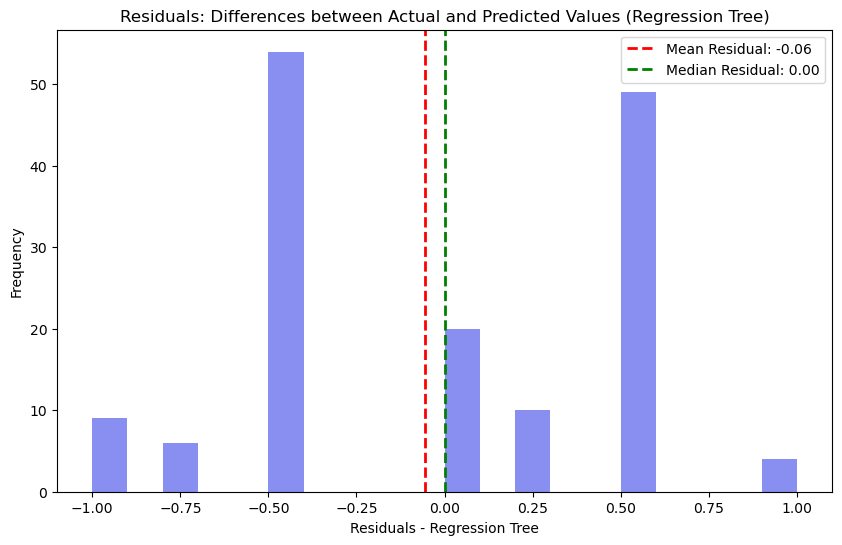

In [64]:
# Calculate residuals
residuals_rt = y_valid_rt - y_pred_rt

# Create a histogram of residuals for the decision tree model
plt.figure(figsize=(10, 6))
plt.hist(residuals_rt, bins=20, alpha=0.5, color='#141ee5')  

# Calculate mean and median of residuals for the decision tree model
mean_residual_rt = residuals_rt.mean()
median_residual_rt = np.median(residuals_rt)

# Add mean and median lines with value labels for the decision tree model
plt.axvline(mean_residual_rt, color='red', linestyle='dashed',\
            linewidth=2, label=f'Mean Residual: {mean_residual_rt:.2f}')

plt.axvline(median_residual_rt, color='green', linestyle='dashed',\
            linewidth=2, label=f'Median Residual: {median_residual_rt:.2f}')

plt.xlabel('Residuals - Regression Tree')
plt.ylabel('Frequency')
plt.title('Residuals: Differences between Actual and Predicted Values (Regression Tree)')
plt.legend()
plt.show()

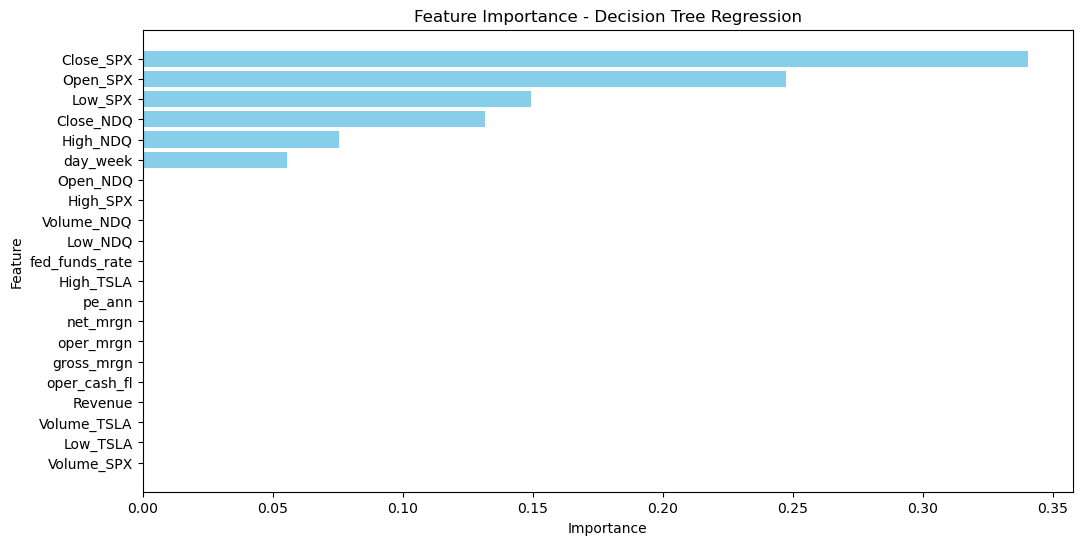

In [65]:
# Get feature importance from the trained Decision Tree model
feature_importances = rt_model.feature_importances_

# Get the names of the features
feature_names = X_rt_z.columns

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar chart to visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree Regression')
plt.gca().invert_yaxis()  
plt.show()

### Linear Regression Model

In [66]:
# Define X and y for the linear regression model
X_linear = X_rt_z
y_linear = df_lr['positive_TSLA']

# Split data into training (60%) and validation (40%) sets
X_train_linear, X_valid_linear, y_train_linear, y_valid_linear\
= train_test_split(X_linear, y_linear, test_size=0.4, random_state=1)

# Fit a multiple linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_linear, y_train_linear)

# Make predictions on the validation set (X_valid_linear)
y_pred_linear = linear_reg_model.predict(X_valid_linear)

# Calculate evaluation measures for the linear regression model
mse_linear = mean_squared_error(y_valid_linear, y_pred_linear)
rmse_linear = mean_squared_error(y_valid_linear, y_pred_linear, squared=False)
mae_linear = mean_absolute_error(y_valid_linear, y_pred_linear)
r2_linear = r2_score(y_valid_linear, y_pred_linear)

# Apply formatting to the outcomes 
mse_linear = '{:,.4f}'.format(mse_linear)
rmse_linear = '{:.4f}'.format(rmse_linear)
mae_linear = '{:.4f}'.format(mae_linear)
r2_linear = '{:.4f}'.format(r2_linear)

# Print coefficients
coefficients = pd.DataFrame({'Predictor': X_linear.columns, 'Coefficient': linear_reg_model.coef_})
display(coefficients)

# Print evaluation measures for the linear regression model
print('Mean Squared Error (MSE) - Linear Regression:', mse_linear)
print('Root Mean Squared Error (RMSE) - Linear Regression:', rmse_linear)
print('Mean Absolute Error (MAE) - Linear Regression:', mae_linear)
print('R-squared (R2) - Linear Regression:', r2_linear)

,Predictor,Coefficient
0,day_week,0.004312
1,High_TSLA,-0.704328
2,Low_TSLA,0.334256
3,Volume_TSLA,0.017146
4,Revenue,0.643979
5,oper_cash_fl,0.073056
6,gross_mrgn,0.052525
7,oper_mrgn,0.665077
8,net_mrgn,-0.656068
9,pe_ann,0.620617


Mean Squared Error (MSE) - Linear Regression: 0.1322
Root Mean Squared Error (RMSE) - Linear Regression: 0.3636
Mean Absolute Error (MAE) - Linear Regression: 0.3046
R-squared (R2) - Linear Regression: 0.4711


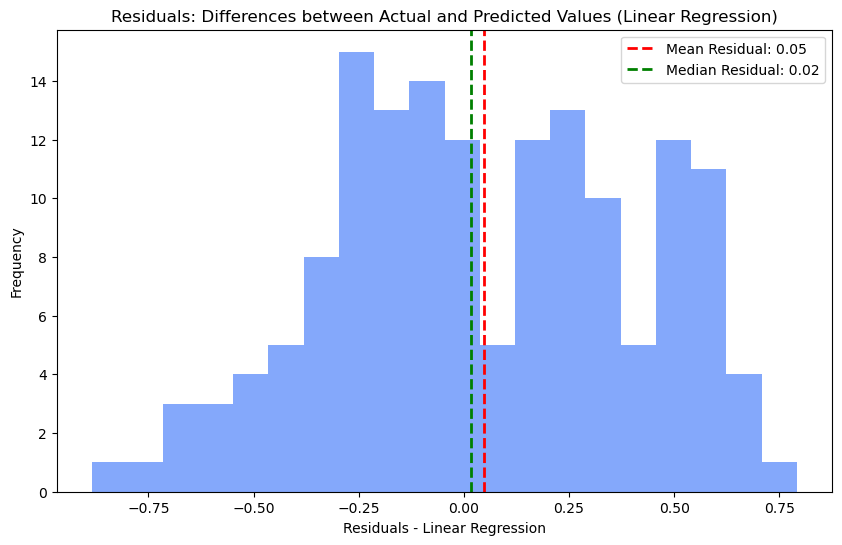

In [67]:
# Calculate residuals
residuals = y_valid_linear - y_pred_linear

# Create a histogram of residuals 
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, alpha=0.5, color='#0b52f9')  

# Calculate mean and median of residuals
mean_residual = residuals.mean()
median_residual = np.median(residuals)

# Add mean and median lines with value labels
plt.axvline(mean_residual, color='red', linestyle='dashed',\
            linewidth=2, label=f'Mean Residual: {mean_residual:.2f}')

plt.axvline(median_residual, color='green', linestyle='dashed',\
            linewidth=2, label=f'Median Residual: {median_residual:.2f}')

plt.xlabel('Residuals - Linear Regression')
plt.ylabel('Frequency')
plt.title('Residuals: Differences between Actual and Predicted Values (Linear Regression)')
plt.legend()
plt.show()

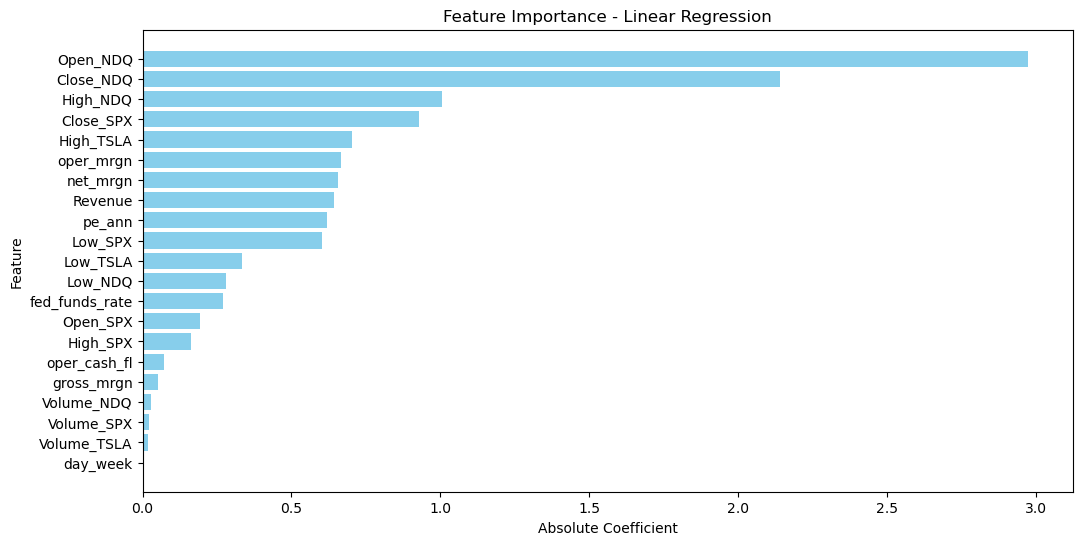

In [68]:
# Get the coefficients (importance) of the features from the trained Linear Regression model
coefficients = linear_reg_model.coef_

# Get the names of the features
feature_names = X_rt_z.columns

# Create a DataFrame to store feature names and their coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by absolute coefficient values in descending order
feature_importance_df['Absolute Coefficient'] = abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Create a bar chart to visualize feature importance (absolute coefficients)
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance - Linear Regression')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [69]:
df = df.apply(pd.to_numeric, errors='coerce')

In [70]:
X = df.drop("Close_TSLA", axis=1)
y = df["Close_TSLA"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model on the training data
rf.fit(X_train, y_train)
#predict
y_pred = rf.predict(X_test)

In [73]:
#Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [74]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 3.9548334717421834
R-squared (R2) Score: 0.9984663935869899


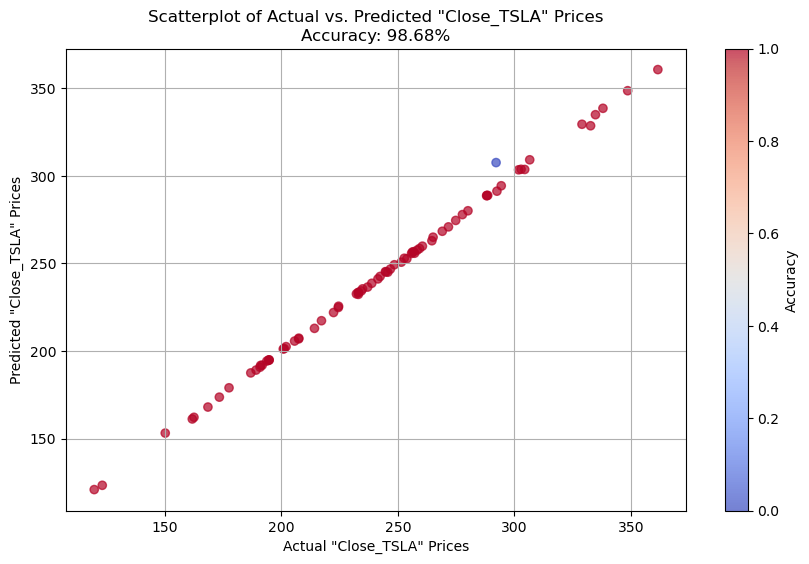

In [75]:
# absolute error
error = np.abs(y_test - y_pred)

# Set a threshold to define prediction accuracy
threshold = 5  
accurate_predictions = (error <= threshold).astype(int)

# percentage of accuracy
accuracy_percentage = (np.sum(accurate_predictions) / len(accurate_predictions)) * 100

# scatterplot of predicted vs. actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c=accurate_predictions, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Accuracy')
plt.xlabel('Actual "Close_TSLA" Prices')
plt.ylabel('Predicted "Close_TSLA" Prices')
plt.title(f'Scatterplot of Actual vs. Predicted "Close_TSLA" Prices\nAccuracy: {accuracy_percentage:.2f}%')
plt.grid(True)

plt.show()


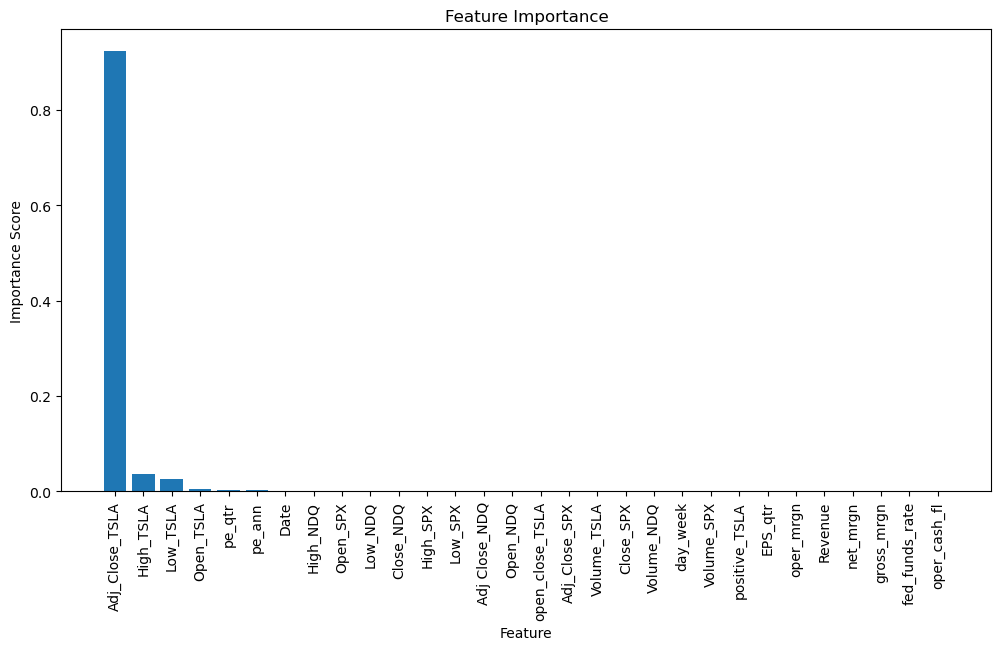

In [76]:
# Feature importance plot
FI = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(12, 6))
sorted_idx = np.argsort(FI)[::-1]
plt.bar(range(X.shape[1]), FI[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.show()